# Correlogram Analysis

This notebook analyzes the results from correlogram experiments.

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob

# Define problem ordering
problem_ordering = [
    'OneMax', 
    #'HelloWorld', 
    'Sphere',
    #'TSP', 
    #'NeuralNetwork',
    'BFS-CNF',
    'BFS-Full', 
    'BFS-EvenParity',
    #'GrammaticalEvolution', 
    ]

## 1. Summary Statistics from Main Results

Read the main CSV results file and create a grouped summary table.

In [158]:
# Read main results file
df = pd.read_csv('outputs/results_2026_01_07_correlogram.csv')
df.head()

,Unnamed: 0,problem,size,size_cat,solver,budget,dist_type,name_type,generator,rep,elapsed,cor_length,onestep_cor,diameter,sr_structural_change_cor,sr_average_parent_length,g_avg_dist,g_total_var,g_norm_corr_length,g_nugget
0,0,OneMax,10,small,correlogram,10000,coarse,lin,one-max,0,1.446499,4.706621,0.788464,9.94,0.0,0.0,2.763158,1.3275,2.533333,0
1,1,OneMax,10,small,correlogram,10000,coarse,str,one-max,0,0.022927,4.706621,0.788464,9.94,0.0,0.0,2.763158,1.3275,2.533333,0
2,2,OneMax,50,medium,correlogram,50000,coarse,lin,one-max,0,0.091433,7.000000,0.855739,50.40,0.0,0.0,3.589474,1.9600,2.228739,0
3,3,OneMax,50,medium,correlogram,50000,coarse,str,one-max,0,0.119969,7.000000,0.855739,50.40,0.0,0.0,3.589474,1.9600,2.228739,0
4,4,OneMax,100,large,correlogram,200000,coarse,lin,one-max,0,0.220250,2.071406,0.816680,100.30,0.0,0.0,3.121053,1.3475,1.100610,0


In [159]:
# Create groupby table across problem / size / dist_type / name_type
# Note: The main results file should have columns for diameter, cor_length, and onestep_cor
# If there are multiple reps, we'll aggregate (mean)

groupby_cols = ['problem', 'size', 'dist_type', 'name_type', 'generator']

summary_cols = ['diameter', 'cor_length', 'onestep_cor', 'sr_structural_change_cor', 'sr_average_parent_length']

summary_table = df.groupby(groupby_cols)[summary_cols].mean()

# Apply problem ordering
summary_table = summary_table.reset_index()
summary_table['problem'] = pd.Categorical(summary_table['problem'], categories=problem_ordering, ordered=True)
summary_table = summary_table.sort_values(['problem', 'size', 'dist_type', 'name_type'])
summary_table = summary_table.set_index(groupby_cols)

summary_table

diameter  cor_length  \
problem        size dist_type name_type generator                              
OneMax         10   coarse    lin       one-max         9.940000    4.706621   
                              str       one-max         9.940000    4.706621   
               50   coarse    lin       one-max        50.400000    7.000000   
                              str       one-max        50.400000    7.000000   
               100  coarse    lin       one-max       100.300000    2.071406   
                              str       one-max       100.300000    2.071406   
BFS-CNF        6    coarse    lin       sr-depth-gen   25.430000    8.120541   
                              str       sr-depth-gen   31.580000    6.159924   
               12   coarse    lin       sr-depth-gen   40.591429    5.018953   
                              str       sr-depth-gen   50.853333    1.433407   
               18   coarse    lin       sr-depth-gen   61.984000    9.133391   
                              str       sr-depth-gen   81.629333    2.960294   
BFS-Full       6    coarse    lin       sr-depth-gen   25.430000    3.968574   
                              str       sr-depth-gen   31.580000    6.129875   
               12   coarse    lin       sr-depth-gen   40.591429    3.918080   
                              str       sr-depth-gen   50.853333    1.638841   
               18   coarse    lin       sr-depth-gen   61.984000    6.404718   
                              str       sr-depth-gen   81.629333   21.000000   
BFS-EvenParity 6    coarse    lin       sr-depth-gen   25.430000    6.079263   
                              str       sr-depth-gen   31.580000    5.189074   
               12   coarse    lin       sr-depth-gen   40.591429    3.325512   
                              str       sr-depth-gen   50.853333   10.886395   
               18   coarse    lin       sr-depth-gen   61.984000    2.089335   
                              str       sr-depth-gen   81.629333    1.039662   

                                                      onestep_cor  \
problem        size dist_type name_type generator                   
OneMax         10   coarse    lin       one-max          0.788464   
                              str       one-max          0.788464   
               50   coarse    lin       one-max          0.855739   
                              str       one-max          0.855739   
               100  coarse    lin       one-max          0.816680   
                              str       one-max          0.816680   
BFS-CNF        6    coarse    lin       sr-depth-gen     0.594552   
                              str       sr-depth-gen     0.660236   
               12   coarse    lin       sr-depth-gen     0.762287   
                              str       sr-depth-gen     0.269891   
               18   coarse    lin       sr-depth-gen     0.715702   
                              str       sr-depth-gen     0.623883   
BFS-Full       6    coarse    lin       sr-depth-gen     0.427764   
                              str       sr-depth-gen     0.755394   
               12   coarse    lin       sr-depth-gen     0.652374   
                              str       sr-depth-gen     0.457179   
               18   coarse    lin       sr-depth-gen     0.624892   
                              str       sr-depth-gen     0.900250   
BFS-EvenParity 6    coarse    lin       sr-depth-gen     0.555250   
                              str       sr-depth-gen     0.752478   
               12   coarse    lin       sr-depth-gen     0.472447   
                              str       sr-depth-gen     0.612064   
               18   coarse    lin       sr-depth-gen    -0.008439   
                              str       sr-depth-gen     0.551838   

                                                      sr_structural_change_cor  \
problem        size dist_type name_type generator                                
OneMax         1

In [160]:
# Save the summary table to CSV
summary_table.to_csv('outputs/correlogram_summary_table.csv')
print("Summary table saved to outputs/correlogram_summary_table.csv")

# Export to LaTeX
latex_str = summary_table.to_latex(float_format="%.3f")
with open('outputs/correlogram_summary_table.tex', 'w') as f:
    f.write(latex_str)
print("Summary table saved to outputs/correlogram_summary_table.tex")

Summary table saved to outputs/correlogram_summary_table.csv
Summary table saved to outputs/correlogram_summary_table.tex


## 2. Plot Correlogram Curves

Read each xy results file and create plots in PDF format.

In [161]:
# Find all xy CSV files
xy_files = glob.glob('outputs/results_2026_01_07_correlogram_xy_*.csv')
print(f"Found {len(xy_files)} xy files to plot")

Found 30 xy files to plot


In [162]:
len(xy_files)

30

In [163]:
sorted(xy_files)

['outputs/results_2026_01_07_correlogram_xy_BFS-CNF_12_medium_50000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_12_medium_50000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_18_large_200000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_18_large_200000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_6_small_10000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-CNF_6_small_10000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenParity_12_medium_50000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenParity_12_medium_50000_coarse_str_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenParity_18_large_200000_coarse_lin_sr-depth-gen_rep0.csv',
 'outputs/results_2026_01_07_correlogram_xy_BFS-EvenPari

In [164]:
# Create plots for each xy file and save as PDF
for xy_file in xy_files:
    # Read the xy data
    xy_df = pd.read_csv(xy_file)
    
    # Extract metadata from filename
    # Format: results_2026_01_07_correlogram_xy_{problem}_{size}_{size_cat}_{budget}_{dist_type}_{name_type}_rep{rep}.csv
    filename = Path(xy_file).stem
    parts = filename.replace('results_2026_01_07_correlogram_xy_', '').split('_')
    
    # Log-scaled marker sizes based on n_axis
    if 'n_axis' in xy_df.columns:
        marker_sizes = np.log10(xy_df['n_axis'] + 1) * 30
    else:
        marker_sizes = 50  # default if n_axis not available
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(xy_df['x_axis'], xy_df['y_axis'], s=marker_sizes, alpha=0.7, edgecolors='black', linewidth=0.5)
    plt.plot(xy_df['x_axis'], xy_df['y_axis'], linestyle='-', linewidth=1, alpha=0.4, color='gray')
    plt.xlabel('Distance', fontsize=12)
    plt.ylabel('Correlation', fontsize=12)
    plt.title(filename.replace('results_2026_01_07_correlogram_xy_', '').replace('_', ' '), fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    
    # Add legend for marker sizes if n_axis is available
    if 'n_axis' in xy_df.columns:
        from matplotlib.lines import Line2D
        n_min, n_max = xy_df['n_axis'].min(), xy_df['n_axis'].max()
        n_reference = [10, 100, 1000, 10000, 100000]
        n_reference = [n for n in n_reference if n_min <= n <= n_max]
        if len(n_reference) > 0:
            legend_elements = [Line2D([0], [0], marker='o', color='w', 
                                      markerfacecolor='gray', 
                                      markersize=np.sqrt(np.log10(n+1)*30/np.pi),
                                      label=f'n={n:,}') 
                               for n in n_reference]
            plt.legend(handles=legend_elements, title='Pairs per bin', loc='best', framealpha=0.9, fontsize=9)
        
        # Add text showing range
        plt.text(0.02, 0.98, f'n range: {int(n_min):,}-{int(n_max):,}', 
                 transform=plt.gca().transAxes, 
                 verticalalignment='top',
                 fontsize=8,
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
    
    # Save as PDF
    pdf_filename = xy_file.replace('.csv', '.pdf')
    plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')
    plt.close()
    
print(f"Created {len(xy_files)} PDF plots")

Created 30 PDF plots


## 3. Summary Statistics by Problem Type

Additional analysis grouping by different dimensions.

## 2b. Display Correlogram Plots in Grid

Display all correlogram plots in a grid layout within the notebook.

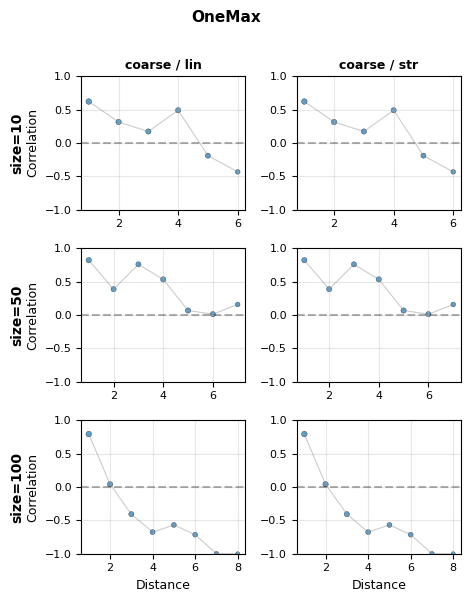

Created grid for OneMax with 3 sizes: [10, 50, 100]


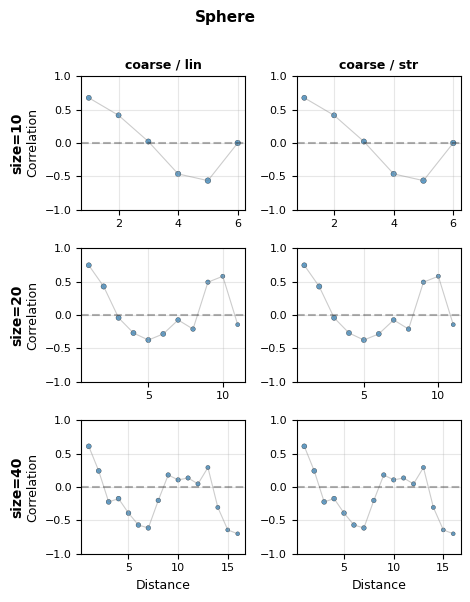

Created grid for Sphere with 3 sizes: [10, 20, 40]


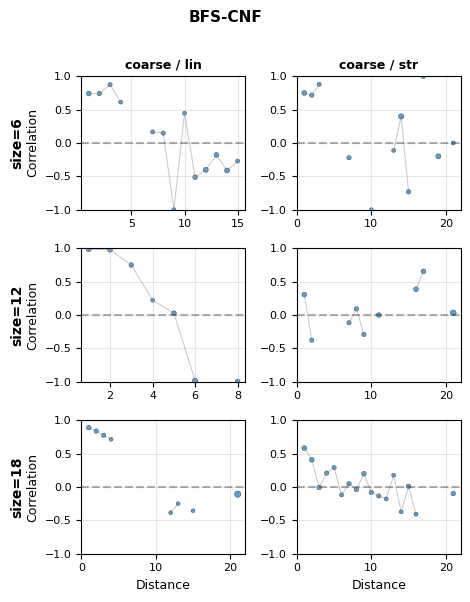

Created grid for BFS-CNF with 3 sizes: [6, 12, 18]


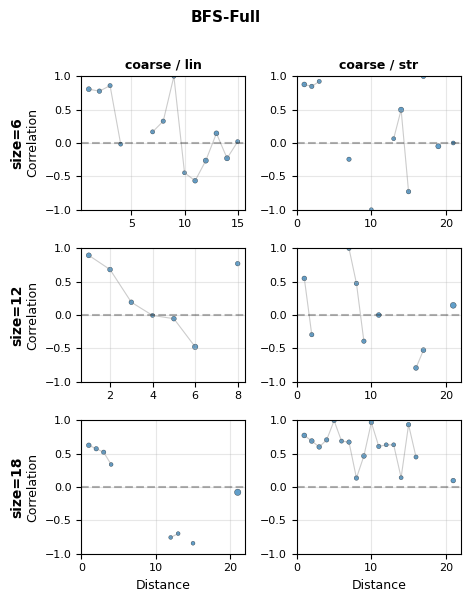

Created grid for BFS-Full with 3 sizes: [6, 12, 18]


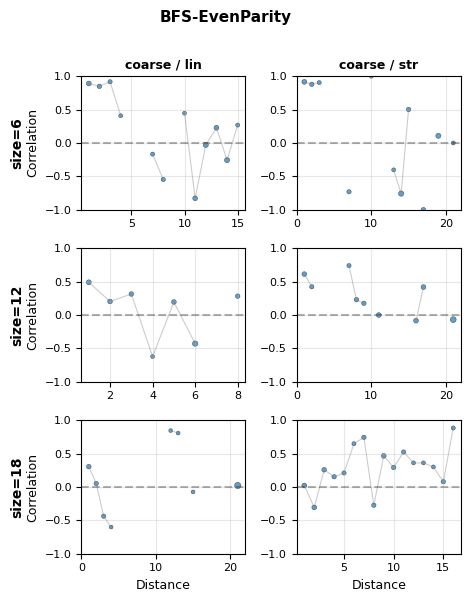

Created grid for BFS-EvenParity with 3 sizes: [6, 12, 18]
Created grids for 5 problems


In [165]:
# Create a grid of plots - one grid per problem
# Within each grid: rows = problem sizes, columns = name_type x dist_type

# Parse filenames to get metadata
plot_data = []
for xy_file in xy_files:
    filename = Path(xy_file).stem
    # Extract parts from filename
    parts = filename.replace('results_2026_01_07_correlogram_xy_', '').split('_')
    
    # Parse: {problem}_{size}_{size_cat}_{budget}_{dist_type}_{name_type}_{generator}_rep{rep}
    try:
        problem = parts[0]
        size = int(parts[1])
        size_cat = parts[2]
        budget = int(parts[3])
        dist_type = parts[4]
        name_type = parts[5]
        generator = parts[6]
        rep = parts[7].replace('rep', '')
        
        plot_data.append({
            'file': xy_file,
            'problem': problem,
            'size': size,
            'size_cat': size_cat,
            'budget': budget,
            'dist_type': dist_type,
            'name_type': name_type,
            'rep': rep
        })
    except:
        print(f"Warning: Could not parse {filename}")

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)
plot_df['problem'] = pd.Categorical(plot_df['problem'], categories=problem_ordering, ordered=True)
plot_df = plot_df.sort_values(['problem', 'size', 'dist_type', 'name_type'])

# Get unique problems and combinations
problems = plot_df['problem'].unique()
dist_types = sorted(plot_df['dist_type'].unique())
name_types = sorted(plot_df['name_type'].unique())

# Create column labels for all combinations of dist_type x name_type
columns = [(dt, nt) for dt in dist_types for nt in name_types]

# Create one grid per problem
for problem in problems:
    problem_df = plot_df[plot_df['problem'] == problem]
    
    if len(problem_df) == 0:
        continue
    
    # Get sizes that actually exist for this problem
    sizes = sorted(problem_df['size'].unique())
    
    # Determine grid dimensions
    n_rows = len(sizes)
    n_cols = len(columns)
    
    # Create figure with smaller size - better for papers
    # Each subplot is 2.5" x 2" instead of 5" x 4"
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols, 2*n_rows))
    
    # Handle case of single row or column
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    fig.suptitle(f'{problem}', fontsize=11, fontweight='bold', y=0.995)
    
    # Plot each cell
    for row_idx, size in enumerate(sizes):
        for col_idx, (dist_type, name_type) in enumerate(columns):
            ax = axes[row_idx, col_idx]
            ax.set_ylim(-1, 1)
            
            # Find the matching file
            matching = problem_df[
                (problem_df['size'] == size) & 
                (problem_df['dist_type'] == dist_type) & 
                (problem_df['name_type'] == name_type)
            ]
            
            if len(matching) > 0:
                # Read the xy data
                xy_df = pd.read_csv(matching.iloc[0]['file'])
                
                # Log-scaled marker sizes based on n_axis (smaller for smaller figure)
                if 'n_axis' in xy_df.columns:
                    marker_sizes = np.log10(xy_df['n_axis'] + 1) * 10
                else:
                    marker_sizes = 15
                
                # Plot
                ax.scatter(xy_df['x_axis'], xy_df['y_axis'], s=marker_sizes, alpha=0.7, 
                          edgecolors='black', linewidth=0.3)
                ax.plot(xy_df['x_axis'], xy_df['y_axis'], linestyle='-', linewidth=0.8, 
                       alpha=0.4, color='gray')
            else:
                # No data for this combination (shouldn't happen now, but keep as fallback)
                ax.text(0.5, 0.5, 'No data', transform=ax.transAxes, 
                       ha='center', va='center', fontsize=8, color='gray')
            
            # Formatting
            ax.grid(True, alpha=0.3)
            ax.axhline(y=0, color='k', linestyle='--', alpha=0.3)
            
            # Labels with appropriate font sizes for smaller figure
            if row_idx == n_rows - 1:
                ax.set_xlabel('Distance', fontsize=9)
            if col_idx == 0:
                ax.set_ylabel('Correlation', fontsize=9)
            
            # Tick label sizes
            ax.tick_params(axis='both', labelsize=8)
            
            # Row labels (size)
            if col_idx == 0:
                ax.text(-0.35, 0.5, f'size={size}', transform=ax.transAxes,
                       fontsize=10, va='center', ha='right', fontweight='bold',
                       rotation=90)
            
            # Column labels (dist_type, name_type)
            if row_idx == 0:
                ax.set_title(f'{dist_type} / {name_type}', fontsize=9, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0, 1, 0.99])
    plt.savefig(f'outputs/correlogram_grid_{problem}.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    
    print(f"Created grid for {problem} with {len(sizes)} sizes: {sizes}")

print(f"Created grids for {len(problems)} problems")

In [166]:
# Group by problem only
by_problem = df.groupby('problem')[summary_cols].mean()
print("\nMean values by problem:")
by_problem


Mean values by problem:


,diameter,cor_length,onestep_cor,sr_structural_change_cor,sr_average_parent_length
problem,,,,,
BFS-CNF,48.678016,5.471085,0.604425,0.252906,15.641333
BFS-EvenParity,48.678016,4.768207,0.489273,0.198973,15.641333
BFS-Full,48.678016,7.176681,0.636309,0.425591,15.641333
OneMax,53.546667,4.592676,0.820294,0.000000,0.000000


In [167]:
# Group by size only
by_size = df.groupby('size')[summary_cols].mean()
print("\nMean values by size:")
by_size


Mean values by size:


,diameter,cor_length,onestep_cor,sr_structural_change_cor,sr_average_parent_length
size,,,,,
6,28.505000,5.941209,0.624279,0.239625,9.5548
10,9.940000,4.706621,0.788464,0.000000,0.0000
12,45.722381,4.370198,0.537707,0.212474,14.7896
18,71.806667,7.104567,0.568021,0.425371,22.5796
50,50.400000,7.000000,0.855739,0.000000,0.0000
100,100.300000,2.071406,0.816680,0.000000,0.0000


In [168]:
# Group by dist_type and name_type
by_type = df.groupby(['dist_type', 'name_type'])[summary_cols].mean()
print("\nMean values by dist_type and name_type:")
by_type


Mean values by dist_type and name_type:


diameter  cor_length  onestep_cor  \
dist_type name_type                                       
coarse    lin        45.388024    5.153033     0.604809   
          str        54.402333    5.851292     0.670341   

                     sr_structural_change_cor  sr_average_parent_length  
dist_type name_type                                                      
coarse    lin                        0.149780                  11.75065  
          str                        0.288955                  11.71135

In [169]:
# Group by problem, size, and name_type
groupby_cols = ['problem', 'size', 'name_type']
summary_cols = ['diameter', 'cor_length', 'onestep_cor', 'sr_structural_change_cor', 'sr_average_parent_length']

correlation_summary = df.groupby(groupby_cols)[summary_cols].mean()

# Apply problem ordering
correlation_summary = correlation_summary.reset_index()
correlation_summary['problem'] = pd.Categorical(correlation_summary['problem'], categories=problem_ordering, ordered=True)
correlation_summary = correlation_summary.sort_values(['problem', 'size', 'name_type'])
correlation_summary = correlation_summary.set_index(groupby_cols)

correlation_summary

diameter  cor_length  onestep_cor  \
problem        size name_type                                        
OneMax         10   lin          9.940000    4.706621     0.788464   
                    str          9.940000    4.706621     0.788464   
               50   lin         50.400000    7.000000     0.855739   
                    str         50.400000    7.000000     0.855739   
               100  lin        100.300000    2.071406     0.816680   
                    str        100.300000    2.071406     0.816680   
BFS-CNF        6    lin         25.430000    8.120541     0.594552   
                    str         31.580000    6.159924     0.660236   
               12   lin         40.591429    5.018953     0.762287   
                    str         50.853333    1.433407     0.269891   
               18   lin         61.984000    9.133391     0.715702   
                    str         81.629333    2.960294     0.623883   
BFS-Full       6    lin         25.430000    3.968574     0.427764   
                    str         31.580000    6.129875     0.755394   
               12   lin         40.591429    3.918080     0.652374   
                    str         50.853333    1.638841     0.457179   
               18   lin         61.984000    6.404718     0.624892   
                    str         81.629333   21.000000     0.900250   
BFS-EvenParity 6    lin         25.430000    6.079263     0.555250   
                    str         31.580000    5.189074     0.752478   
               12   lin         40.591429    3.325512     0.472447   
                    str         50.853333   10.886395     0.612064   
               18   lin         61.984000    2.089335    -0.008439   
                    str         81.629333    1.039662     0.551838   

                               sr_structural_change_cor  \
problem        size name_type                             
OneMax         10   lin                        0.000000   
                    str                        0.000000   
               50   lin                        0.000000   
                    str                        0.000000   
               100  lin                        0.000000   
                    str                        0.000000   
BFS-CNF        6    lin                        0.316659   
                    str                        0.429604   
               12   lin                        0.009248   
                    str                        0.277848   
               18   lin                        0.106292   
                    str                        0.377784   
BFS-Full       6    lin                        0.207443   
                    str                        0.339325   
               12   lin                        0.236449   
                    str                        0.411961   
               18   lin                        0.628177   
                    str                        0.730194   
BFS-EvenParity 6    lin                       -0.034440   
                    str                        0.179159   
               12   lin                        0.075035   
                    str                        0.264303   
               18   lin                        0.252497   
                    str                        0.457284   

                               sr_average_parent_length  
problem        size name_type                            
OneMax         10   lin                          0.0000  
                    str                          0.0000  
               50   lin                          0.0000  
                    str                          0.0000  
               100  lin                          0.0000  
                    str                          0.0000  
BFS-CNF        6    lin                          9.5964  
                    str                          9.5132  
               12   lin                         14.8428  
                    str                

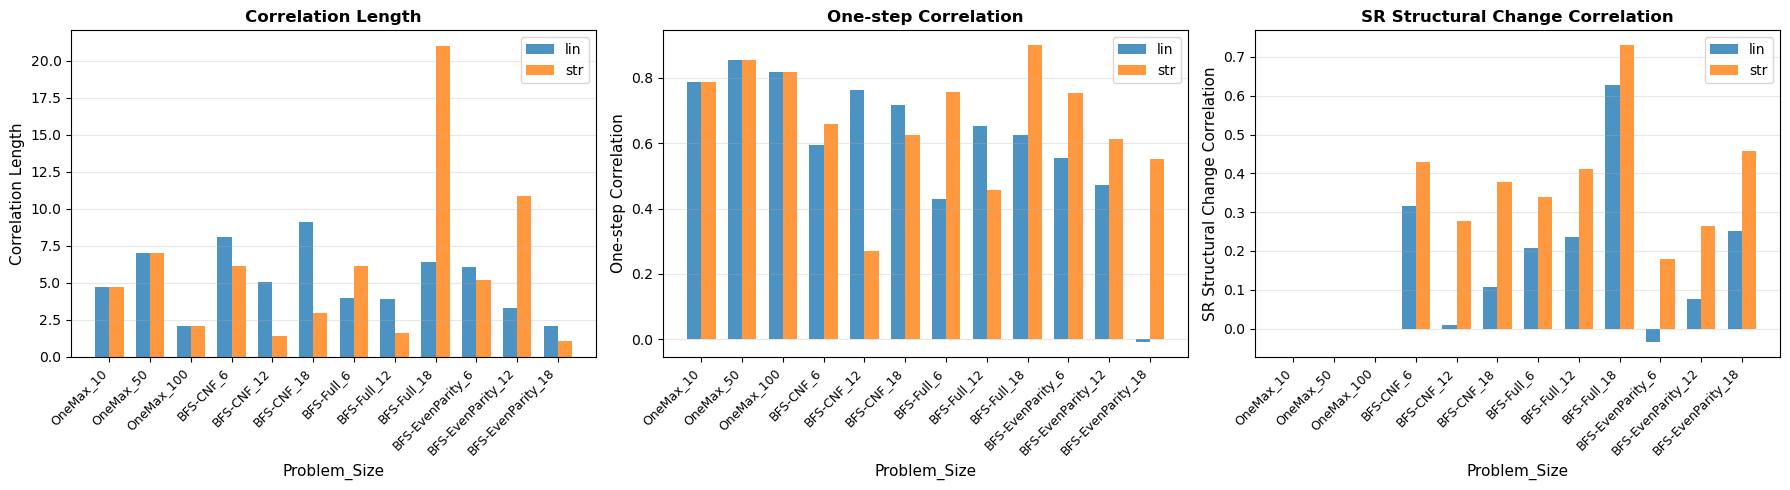

In [170]:
# Visualize the three key metrics with bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['cor_length', 'onestep_cor', 'sr_structural_change_cor']
metric_labels = ['Correlation Length', 'One-step Correlation', 'SR Structural Change Correlation']

# Prepare data for plotting
plot_data = correlation_summary.reset_index()

# Create x-axis labels combining problem and size
plot_data['problem_size'] = plot_data['problem'].astype(str) + '_' + plot_data['size'].astype(str)

# Get unique problem_size combinations in order
problem_sizes = plot_data['problem_size'].unique()

# Set up bar positions
x = np.arange(len(problem_sizes))
width = 0.35

for idx, (metric, label) in enumerate(zip(metrics, metric_labels)):
    ax = axes[idx]
    
    # Separate data by name_type
    lin_data = plot_data[plot_data['name_type'] == 'lin'].set_index('problem_size')[metric]
    str_data = plot_data[plot_data['name_type'] == 'str'].set_index('problem_size')[metric]
    
    # Align data with problem_sizes order
    lin_values = [lin_data.get(ps, 0) for ps in problem_sizes]
    str_values = [str_data.get(ps, 0) for ps in problem_sizes]
    
    # Create bars
    ax.bar(x - width/2, lin_values, width, label='lin', alpha=0.8)
    ax.bar(x + width/2, str_values, width, label='str', alpha=0.8)
    
    # Formatting
    ax.set_xlabel('Problem_Size', fontsize=11)
    ax.set_ylabel(label, fontsize=11)
    ax.set_title(label, fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(problem_sizes, rotation=45, ha='right', fontsize=9)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/correlation_metrics_barplot.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()

## Variogram

In [171]:
from skgstat import Variogram, MetricSpace

# model='exponential', 'spherical'
def make_variogram(dist_matrix, y, n_lags, model='spherical'):
    # copied from https://colab.research.google.com/drive/13rUkHW3DxhkRR6ZjujGjfvmp3N0U1hix

    n = len(y)
    dummy = np.random.random((n, 2)) # we will over-write                
    ms = MetricSpace(dummy) 
    ms._dists = dist_matrix

    # 3. ANALYSIS
    # Increasing n_lags helps capture the fine-grained scatter
    V = Variogram(
        coordinates=ms,
        values=y,
        n_lags=n_lags,
        model=model,
    )

    # 4. NORMALIZATION
    avg_dist = np.mean(V.distance)
    total_variance = np.var(y)

    # 6. OUTPUT STATS
    norm_corr_length = V.parameters[0] / avg_dist
    return avg_dist, total_variance, norm_corr_length, V.parameters[2], V


def plot_variogram(V, avg_dist, total_variance, ax):
    """Plot a single variogram in the given axes"""
    x_dots_norm = V.bins / avg_dist
    y_dots_corr = 1 - (V.experimental / total_variance)

    # Generate smooth curve for X[0, 2]
    x_smooth_raw = np.linspace(1e-9, avg_dist * 2, 100)
    x_smooth_norm = x_smooth_raw / avg_dist
    y_smooth_corr = 1 - (V.fitted_model(x_smooth_raw) / total_variance)

    # Plot the bunched points from all walks
    ax.scatter(x_dots_norm, y_dots_corr, color='firebrick', s=15, alpha=0.6,
                edgecolors='black', linewidth=0.3)

    # Plot the interpolating trend line
    ax.plot(x_smooth_norm, y_smooth_corr, color='royalblue', linewidth=2,
            label='Fitted')

    # Formatting
    ax.set_xlim(0, 2)
    ax.set_ylim(-1, 1)
    ax.axhline(0, color='black', lw=1, alpha=0.3)
    ax.axvline(1, color='forestgreen', linestyle='--', alpha=0.5)
    ax.grid(True, linestyle=':', alpha=0.3)

In [172]:
# Find all distance matrix files (*.npy, not *_fitness.npy)
dist_matrix_files = [f for f in glob.glob('outputs/results_2026_01_07_correlogram_xy_*.npy') 
                     if not f.endswith('_fitness.npy')]
print(f"Found {len(dist_matrix_files)} distance matrix files")

# Parse filenames to get metadata
variogram_data = []
for dist_file in dist_matrix_files:
    filename = Path(dist_file).stem
    # Extract parts from filename
    parts = filename.replace('results_2026_01_07_correlogram_xy_', '').split('_')
    
    # Parse: {problem}_{size}_{size_cat}_{budget}_{dist_type}_{name_type}_{generator}_rep{rep}
    try:
        problem = parts[0]
        size = int(parts[1])
        size_cat = parts[2]
        budget = int(parts[3])
        dist_type = parts[4]
        name_type = parts[5]
        generator = parts[6]
        rep = parts[7].replace('rep', '')
        
        # Construct fitness file path
        fitness_file = dist_file.replace('.npy', '_fitness.npy')
        
        variogram_data.append({
            'dist_file': dist_file,
            'fitness_file': fitness_file,
            'problem': problem,
            'size': size,
            'size_cat': size_cat,
            'budget': budget,
            'dist_type': dist_type,
            'name_type': name_type,
            'generator': generator,
            'rep': rep
        })
    except Exception as e:
        print(f"Warning: Could not parse {filename}: {e}")

# Convert to DataFrame
variogram_df = pd.DataFrame(variogram_data)
variogram_df['problem'] = pd.Categorical(variogram_df['problem'], categories=problem_ordering, ordered=True)
variogram_df = variogram_df.sort_values(['problem', 'size', 'dist_type', 'name_type'])

print(f"Successfully parsed {len(variogram_df)} files")
variogram_df.head()

Found 24 distance matrix files
Successfully parsed 24 files


,dist_file,fitness_file,problem,size,size_cat,budget,dist_type,name_type,generator,rep
14,outputs/results_2026_01_07_correlogram_xy_OneM...,outputs/results_2026_01_07_correlogram_xy_OneM...,OneMax,10,small,10000,coarse,lin,one-max,0
6,outputs/results_2026_01_07_correlogram_xy_OneM...,outputs/results_2026_01_07_correlogram_xy_OneM...,OneMax,10,small,10000,coarse,str,one-max,0
12,outputs/results_2026_01_07_correlogram_xy_OneM...,outputs/results_2026_01_07_correlogram_xy_OneM...,OneMax,50,medium,50000,coarse,lin,one-max,0
7,outputs/results_2026_01_07_correlogram_xy_OneM...,outputs/results_2026_01_07_correlogram_xy_OneM...,OneMax,50,medium,50000,coarse,str,one-max,0
17,outputs/results_2026_01_07_correlogram_xy_OneM...,outputs/results_2026_01_07_correlogram_xy_OneM...,OneMax,100,large,200000,coarse,lin,one-max,0


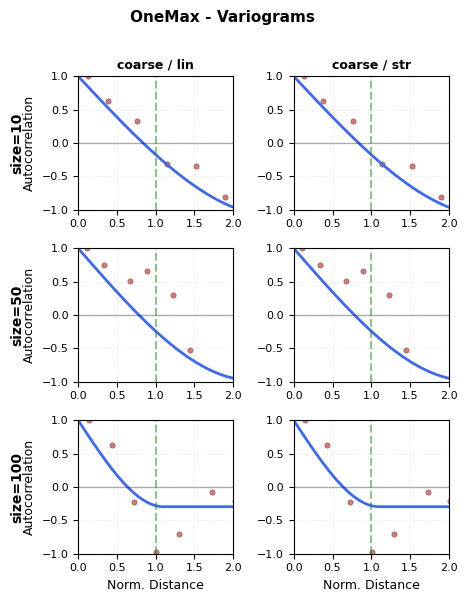

Created variogram grid for OneMax with 3 sizes: [10, 50, 100]


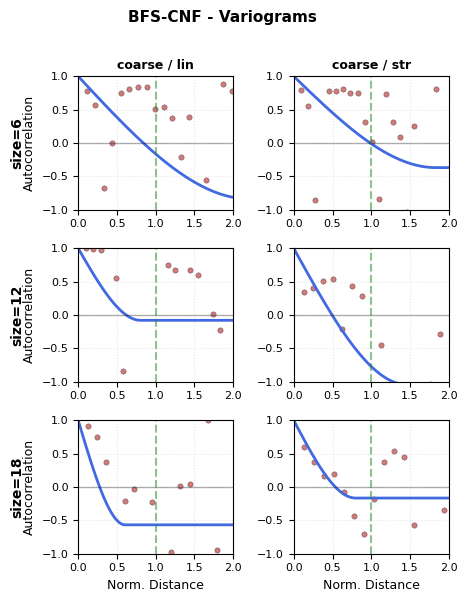

Created variogram grid for BFS-CNF with 3 sizes: [6, 12, 18]


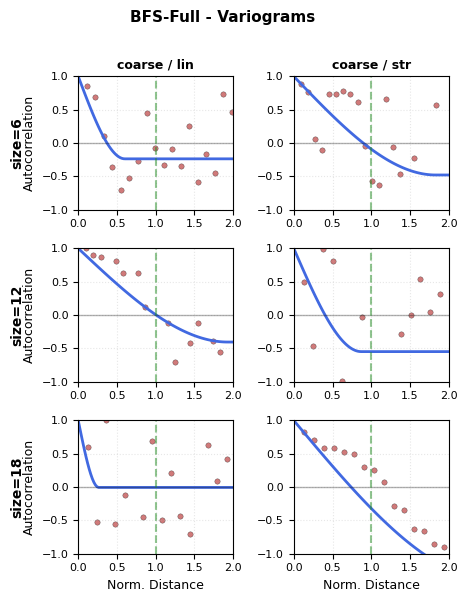

Created variogram grid for BFS-Full with 3 sizes: [6, 12, 18]


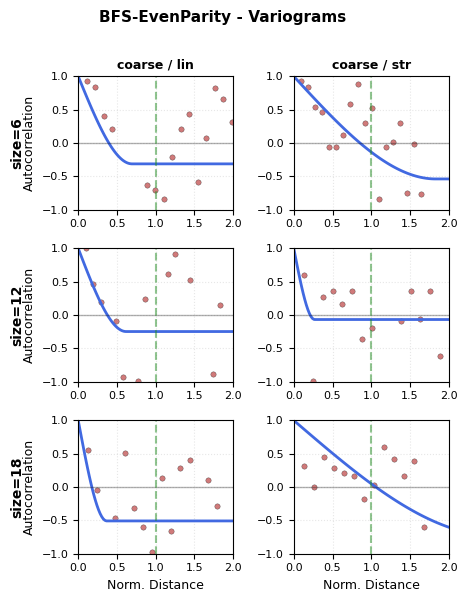

Created variogram grid for BFS-EvenParity with 3 sizes: [6, 12, 18]
Created variogram grids for 4 problems


In [173]:
# Generate variograms and create grid plots
# Parameters for variogram
N_LAGS = 20
MODEL = 'spherical'

# Get unique problems and combinations
problems = variogram_df['problem'].unique()
dist_types = sorted(variogram_df['dist_type'].unique())
name_types = sorted(variogram_df['name_type'].unique())

# Create column labels for all combinations of dist_type x name_type
columns = [(dt, nt) for dt in dist_types for nt in name_types]

# Create one grid per problem
for problem in problems:
    problem_df = variogram_df[variogram_df['problem'] == problem]
    
    if len(problem_df) == 0:
        continue
    
    # Get sizes that actually exist for this problem
    sizes = sorted(problem_df['size'].unique())
    
    # Determine grid dimensions
    n_rows = len(sizes)
    n_cols = len(columns)
    
    # Create figure with same size as correlogram grids
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5*n_cols, 2*n_rows))
    
    # Handle case of single row or column
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    fig.suptitle(f'{problem} - Variograms', fontsize=11, fontweight='bold', y=0.995)
    
    # Plot each cell
    for row_idx, size in enumerate(sizes):
        for col_idx, (dist_type, name_type) in enumerate(columns):
            ax = axes[row_idx, col_idx]
            
            # Find the matching file
            matching = problem_df[
                (problem_df['size'] == size) & 
                (problem_df['dist_type'] == dist_type) & 
                (problem_df['name_type'] == name_type)
            ]
            
            if len(matching) > 0:
                try:
                    # Load distance matrix and fitness values
                    dist_matrix = np.load(matching.iloc[0]['dist_file'])
                    fitness_vals = np.load(matching.iloc[0]['fitness_file'])
                    
                    # Generate variogram
                    avg_dist, total_variance, norm_corr_length, nugget, V = make_variogram(
                        dist_matrix, fitness_vals, N_LAGS, model=MODEL
                    )
                    
                    # Plot variogram
                    plot_variogram(V, avg_dist, total_variance, ax)
                    
                except Exception as e:
                    ax.text(0.5, 0.5, f'Error:\n{str(e)[:30]}', transform=ax.transAxes, 
                           ha='center', va='center', fontsize=7, color='red')
            else:
                ax.text(0.5, 0.5, 'No data', transform=ax.transAxes, 
                       ha='center', va='center', fontsize=8, color='gray')
            
            # Labels with appropriate font sizes
            if row_idx == n_rows - 1:
                ax.set_xlabel('Norm. Distance', fontsize=9)
            if col_idx == 0:
                ax.set_ylabel('Autocorrelation', fontsize=9)
            
            # Tick label sizes
            ax.tick_params(axis='both', labelsize=8)
            
            # Row labels (size)
            if col_idx == 0:
                ax.text(-0.35, 0.5, f'size={size}', transform=ax.transAxes,
                       fontsize=10, va='center', ha='right', fontweight='bold',
                       rotation=90)
            
            # Column labels (dist_type, name_type)
            if row_idx == 0:
                ax.set_title(f'{dist_type} / {name_type}', fontsize=9, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0, 1, 0.99])
    plt.savefig(f'outputs/variogram_grid_{problem}.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()
    
    print(f"Created variogram grid for {problem} with {len(sizes)} sizes: {sizes}")

print(f"Created variogram grids for {len(problems)} problems")

# Solver

In [174]:
# Read solver results
solver_df = pd.read_csv('outputs/results_2026_01_07_correlogram_solver.csv')

solver_df.head()

,Unnamed: 0,problem,size,size_cat,solver,budget,dist_type,name_type,generator,rep,elapsed,fx,norm_fx,geno_size,hist_len,pheno,geno
0,0,OneMax,10,small,genetic_algorithm,10000,coarse,lin,one-max,0,1.323478,10,1.0,10,4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","{'0': Dist(choice, ([0, 1],), {}, val=1), '1':..."
1,1,OneMax,10,small,genetic_algorithm,10000,coarse,str,one-max,0,0.087074,10,1.0,10,4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","{'root/iter@(2,6):0/choice@(2,62)': Dist(choic..."
2,2,OneMax,10,small,random_search,10000,coarse,lin,one-max,0,0.022358,10,1.0,10,323,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","{'0': Dist(choice, ([0, 1],), {}, val=1), '1':..."
3,3,OneMax,10,small,hill_climber,10000,coarse,lin,one-max,0,0.003455,10,1.0,10,72,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","{'0': Dist(choice, ([0, 1],), {}, val=1), '1':..."
4,4,OneMax,10,small,hill_climber,10000,coarse,str,one-max,0,0.006966,10,1.0,10,72,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","{'root/iter@(2,6):0/choice@(2,62)': Dist(choic..."


In [175]:
# Group by problem, size, solver, name_type and aggregate statistics
groupby_cols = ['problem', 'size', 'solver', 'name_type', 'generator']
agg_cols = ['fx', 'norm_fx', 'elapsed', 'geno_size', 'hist_len']

# Compute mean and std for each metric
solver_summary = solver_df.groupby(groupby_cols)[agg_cols].agg(['mean', 'std'])

# Flatten column names
solver_summary.columns = ['_'.join(col).strip() for col in solver_summary.columns.values]

# Apply problem ordering
solver_summary = solver_summary.reset_index()
solver_summary['problem'] = pd.Categorical(solver_summary['problem'], categories=problem_ordering, ordered=True)
solver_summary = solver_summary.sort_values(['problem', 'size', 'solver', 'name_type'])

solver_summary

,problem,size,solver,name_type,generator,fx_mean,fx_std,norm_fx_mean,norm_fx_std,elapsed_mean,elapsed_std,geno_size_mean,geno_size_std,hist_len_mean,hist_len_std
45,OneMax,10,genetic_algorithm,lin,one-max,10.00,0.000000,1.000000,0.000000,1.020047,0.431036,10.0,0.000000,3.60,0.882580
46,OneMax,10,genetic_algorithm,str,one-max,10.00,0.000000,1.000000,0.000000,0.601036,0.542438,10.0,0.000000,3.60,0.882580
47,OneMax,10,hill_climber,lin,one-max,10.00,0.000000,1.000000,0.000000,0.061136,0.059632,10.0,0.000000,73.20,34.039605
48,OneMax,10,hill_climber,str,one-max,10.00,0.000000,1.000000,0.000000,0.070025,0.067977,10.0,0.000000,73.20,34.039605
49,OneMax,10,random_search,lin,one-max,10.00,0.000000,1.000000,0.000000,0.983015,1.186494,10.0,0.000000,1218.40,1337.893608
50,OneMax,50,genetic_algorithm,lin,one-max,50.00,0.000000,1.000000,0.000000,39.743079,33.764709,50.0,0.000000,18.30,1.592747
51,OneMax,50,genetic_algorithm,str,one-max,50.00,0.000000,1.000000,0.000000,40.658592,34.410510,50.0,0.000000,18.30,1.592747
52,OneMax,50,hill_climber,lin,one-max,50.00,0.000000,1.000000,0.000000,3.049763,3.176648,50.0,0.000000,553.65,189.806626
53,OneMax,50,hill_climber,str,one-max,50.00,0.000000,1.000000,0.000000,3.090439,3.314840,50.0,0.000000,553.65,189.806626
54,OneMax,50,random_search,lin,one-max,39.35,0.988087,0.573791,0.040063,248.899828,222.715658,50.0,0.000000,50001.00,0.000000


In [176]:
# Find all history CSV files
history_files = glob.glob('outputs/history_*.csv')
print(f"Found {len(history_files)} history files")

# Parse filenames to get metadata
# Format: history_{problem}_{size}_{size_cat}_{solver}_{budget}_{dist_type}_{name_type}_{generator}_{rep}.csv
# Problem: solver can be multi-word with underscores (hill_climber, random_search, genetic_algorithm)
history_data = []
for hist_file in history_files:
    filename = Path(hist_file).stem
    parts = filename.replace('history_', '').split('_')
    
    try:
        # Strategy: known solvers are multi-word, so check for them
        known_solvers = ['hill_climber', 'random_search', 'genetic_algorithm']
        
        # Find which solver it is by checking if parts contain known solver names
        solver = None
        solver_start_idx = None
        for i in range(len(parts)):
            # Try to match multi-word solvers
            for known_solver in known_solvers:
                solver_parts = known_solver.split('_')
                if parts[i:i+len(solver_parts)] == solver_parts:
                    solver = known_solver
                    solver_start_idx = i
                    break
            if solver:
                break
        
        if solver is None:
            print(f"Warning: Could not identify solver in {filename}")
            continue
        
        # Now we know where the solver is, we can parse the rest
        problem = parts[0]
        size = int(parts[1])
        size_cat = parts[2]
        # solver already identified
        solver_end_idx = solver_start_idx + len(solver.split('_'))
        budget = int(parts[solver_end_idx])
        dist_type = parts[solver_end_idx + 1]
        name_type = parts[solver_end_idx + 2]
        generator = parts[solver_end_idx + 3]
        rep = int(parts[solver_end_idx + 4])
        
        history_data.append({
            'file': hist_file,
            'problem': problem,
            'size': size,
            'size_cat': size_cat,
            'solver': solver,
            'budget': budget,
            'dist_type': dist_type,
            'name_type': name_type,
            'generator': generator,
            'rep': rep
        })
    except Exception as e:
        print(f"Warning: Could not parse {filename}: {e}")

# Convert to DataFrame
history_df = pd.DataFrame(history_data)
history_df['problem'] = pd.Categorical(history_df['problem'], categories=problem_ordering, ordered=True)
history_df = history_df.sort_values(['problem', 'size', 'solver', 'name_type', 'rep'])

print(f"Successfully parsed {len(history_df)} files")
print(f"Unique combinations: {len(history_df.groupby(['problem', 'size', 'solver', 'name_type']))}")
history_df.head()

Found 1200 history files
Successfully parsed 1200 files
Unique combinations: 60


,file,problem,size,size_cat,solver,budget,dist_type,name_type,generator,rep
735,outputs/history_OneMax_10_small_genetic_algori...,OneMax,10,small,genetic_algorithm,10000,coarse,lin,one-max,0
780,outputs/history_OneMax_10_small_genetic_algori...,OneMax,10,small,genetic_algorithm,10000,coarse,lin,one-max,1
855,outputs/history_OneMax_10_small_genetic_algori...,OneMax,10,small,genetic_algorithm,10000,coarse,lin,one-max,2
814,outputs/history_OneMax_10_small_genetic_algori...,OneMax,10,small,genetic_algorithm,10000,coarse,lin,one-max,3
706,outputs/history_OneMax_10_small_genetic_algori...,OneMax,10,small,genetic_algorithm,10000,coarse,lin,one-max,4


Generating 60 fitness-vs-iteration plots...


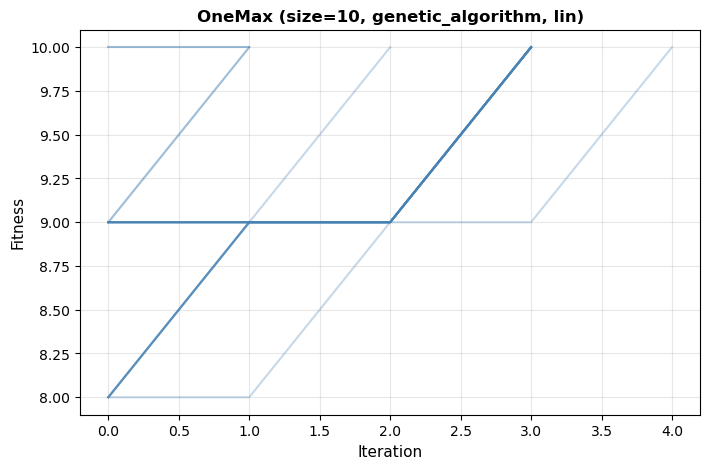

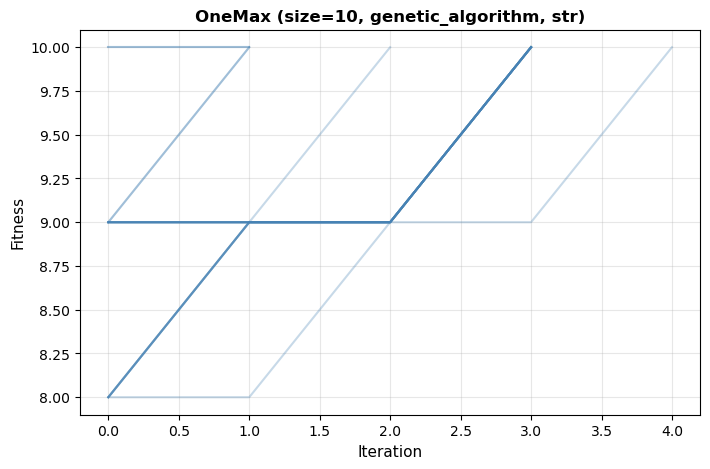

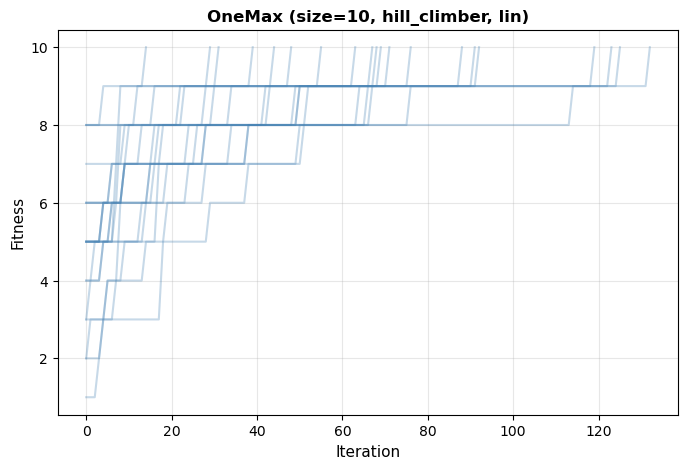

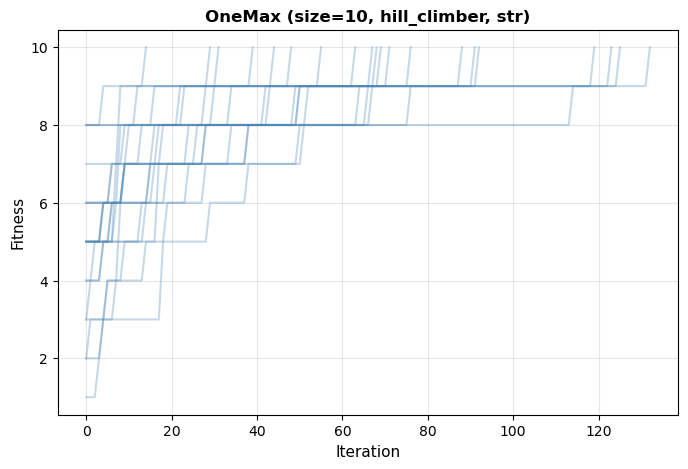

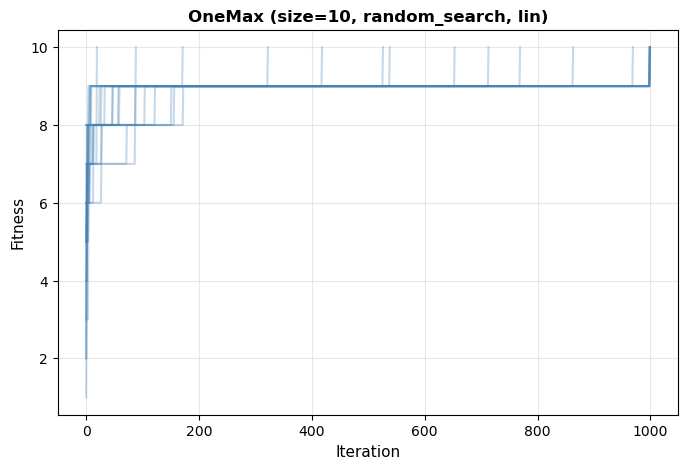

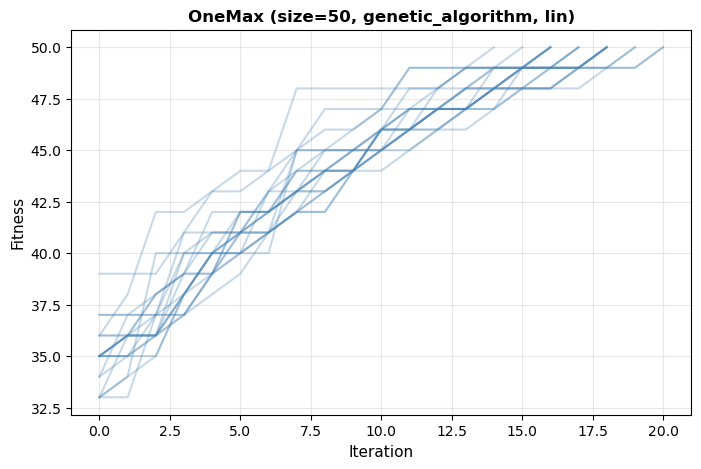

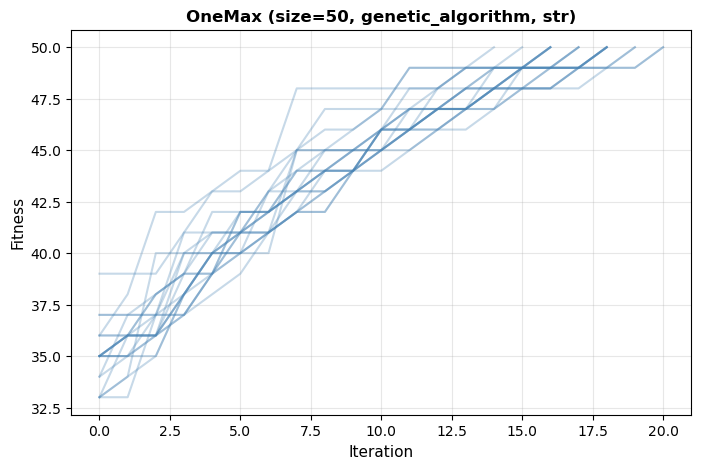

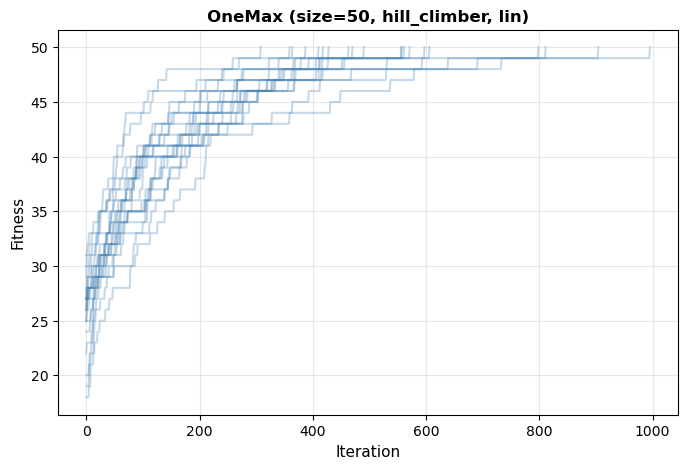

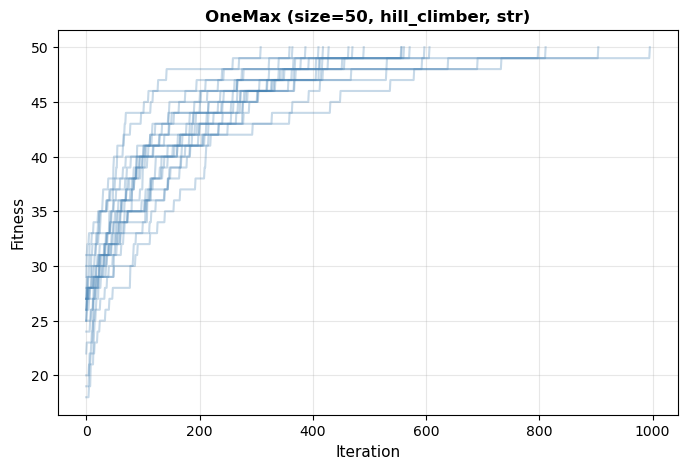

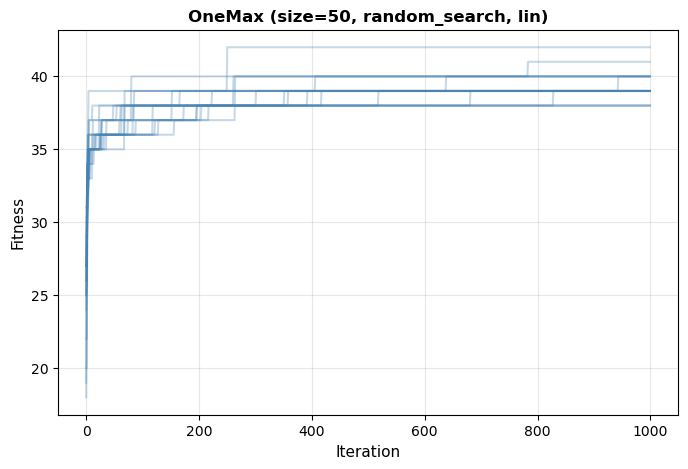

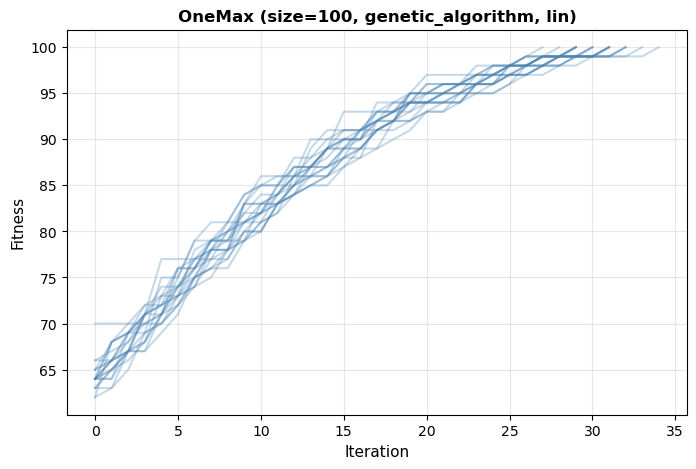

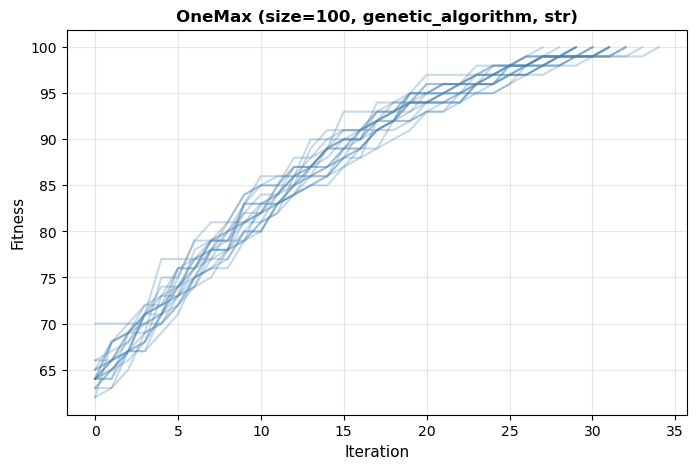

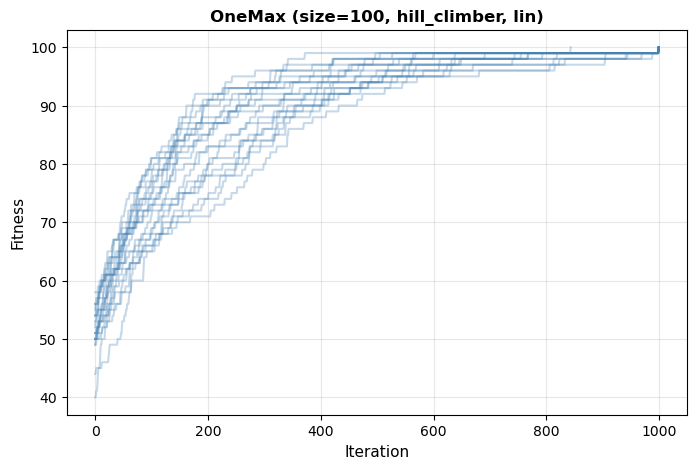

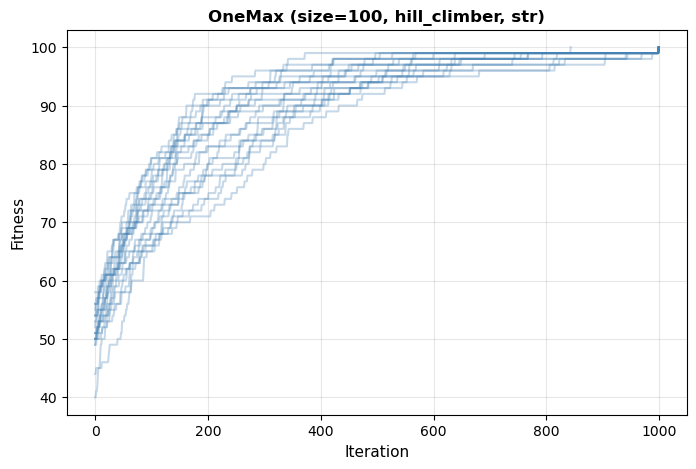

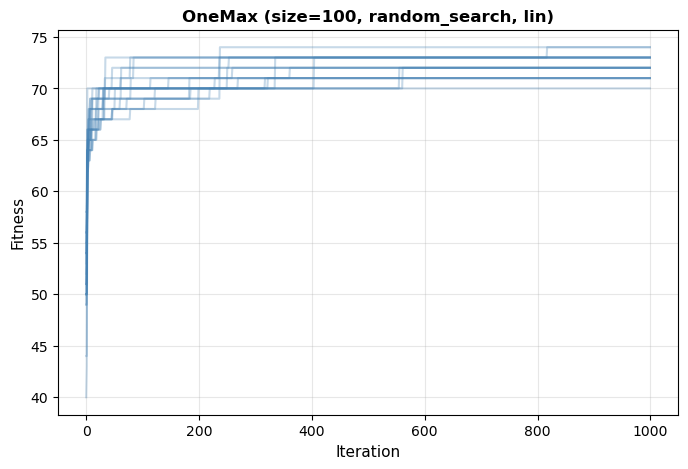

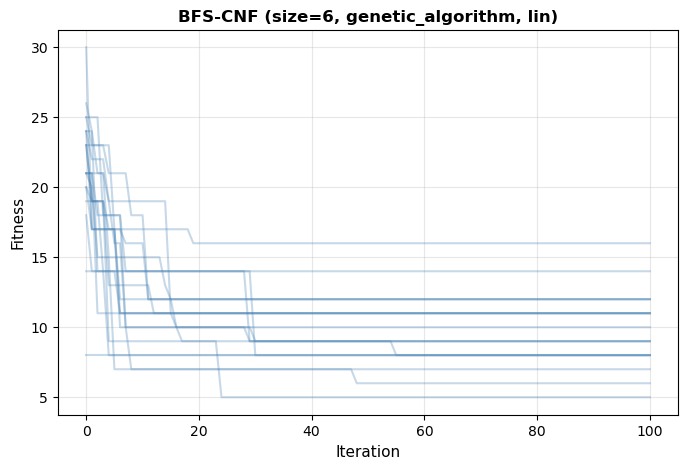

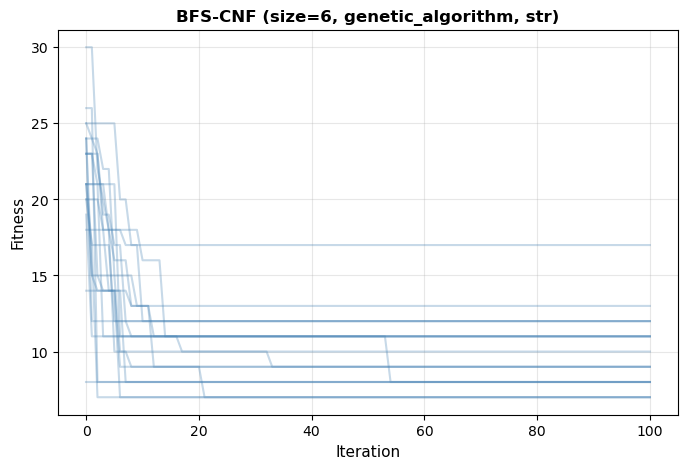

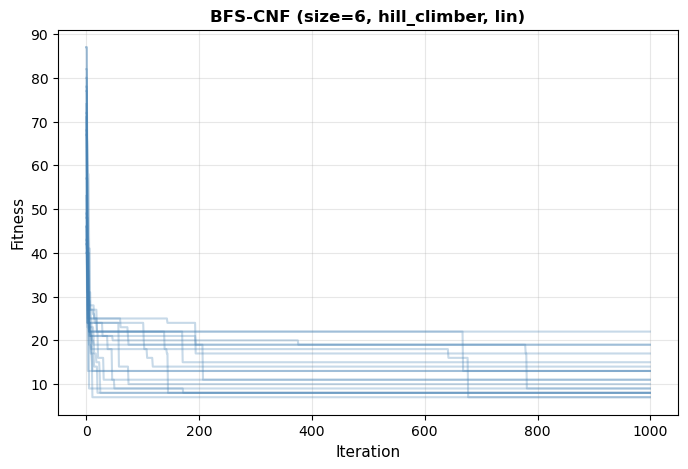

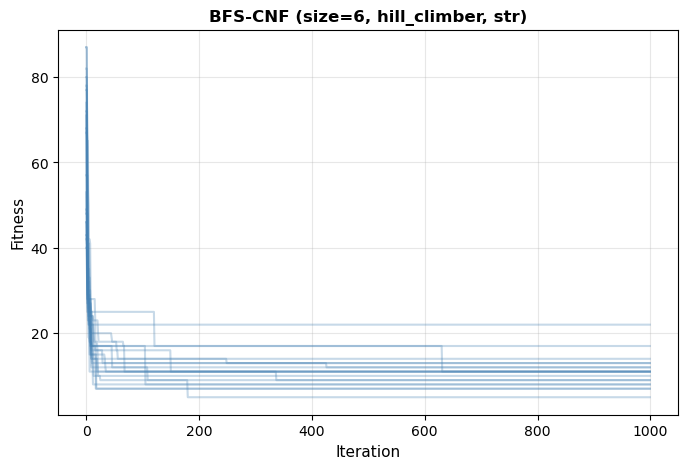

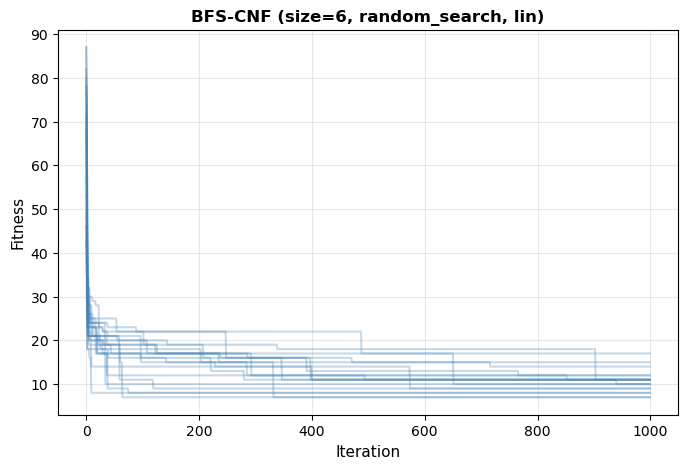

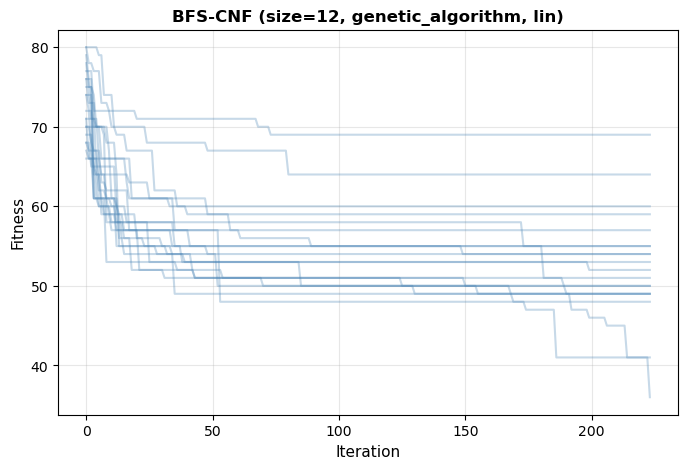

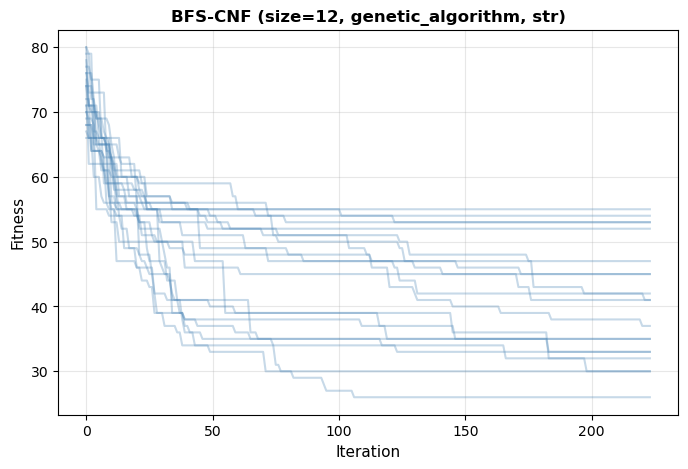

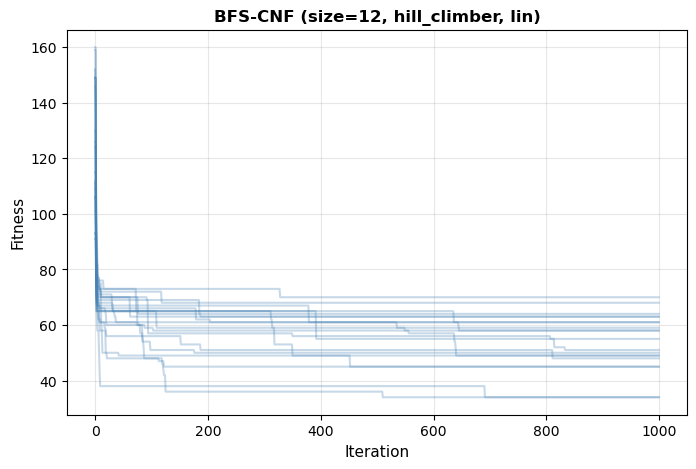

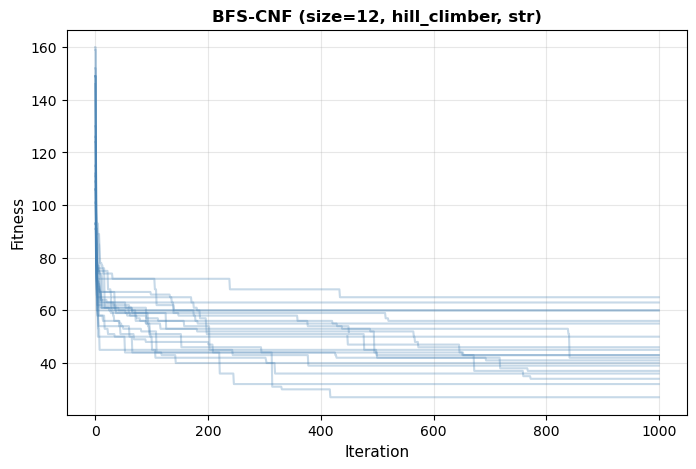

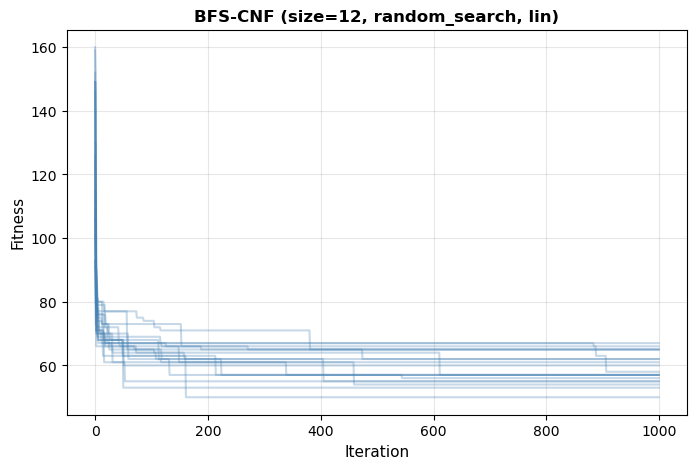

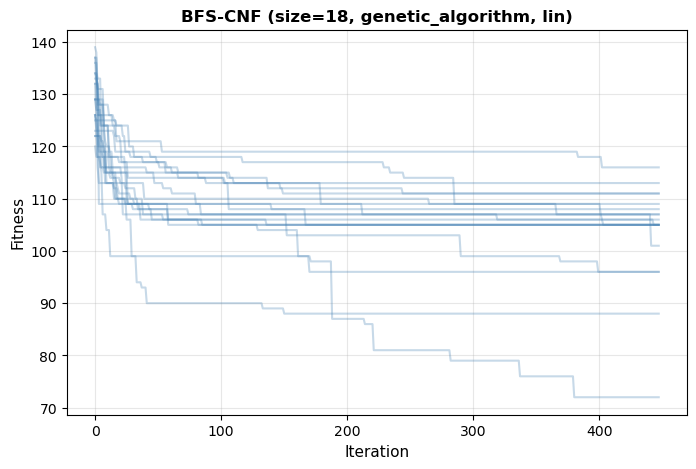

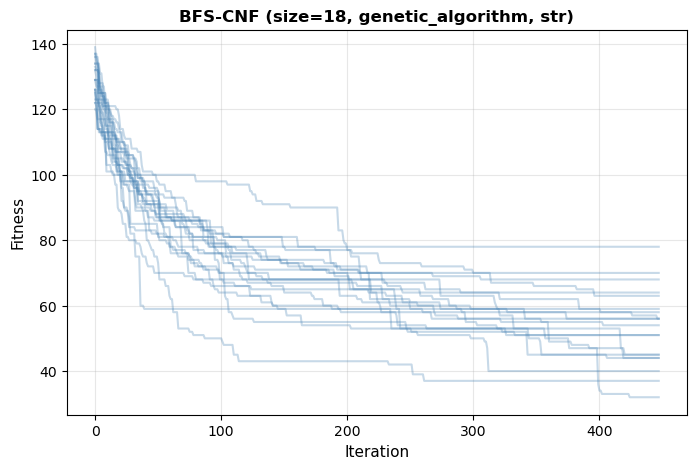

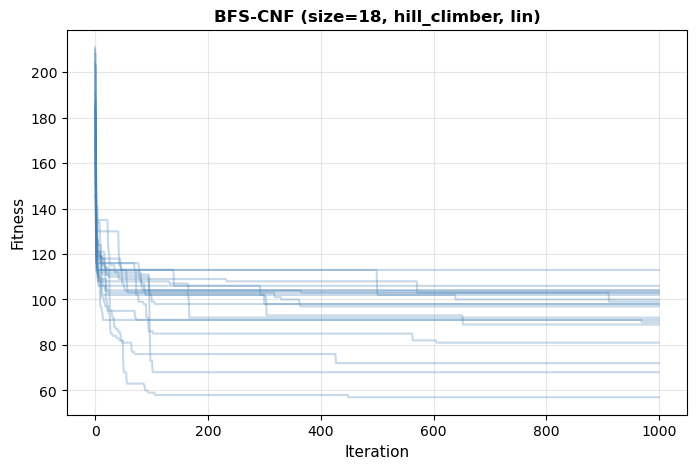

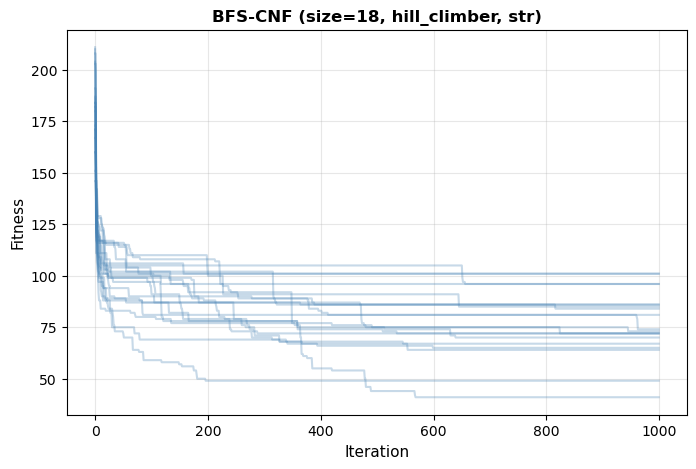

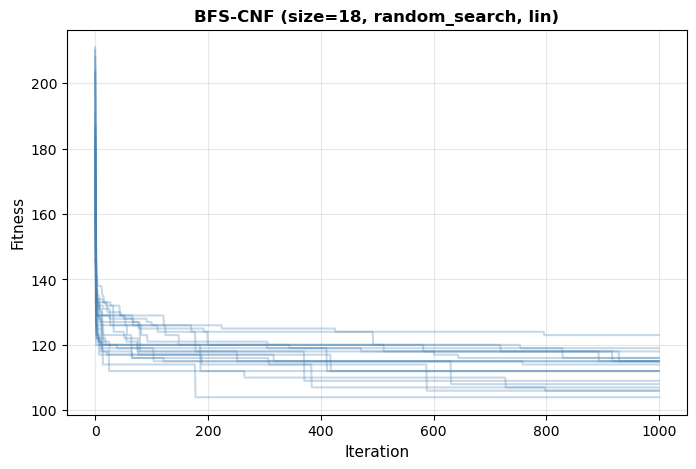

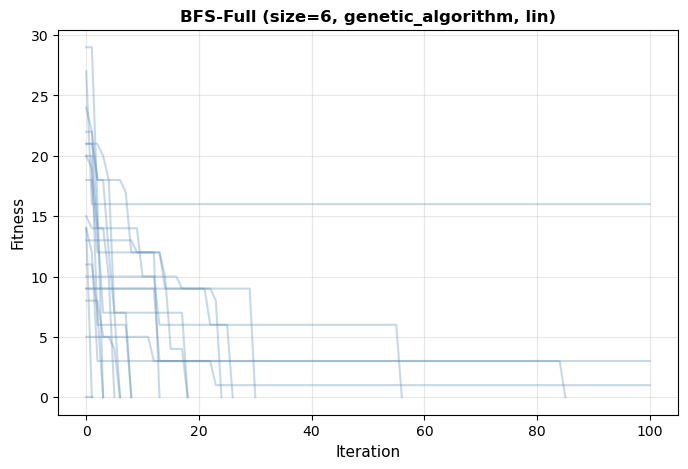

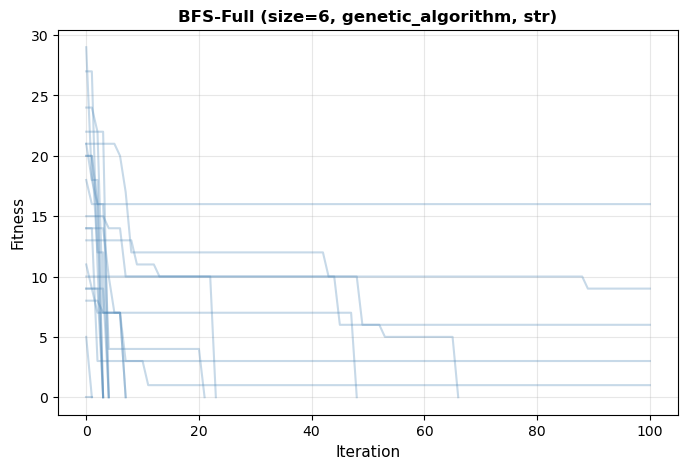

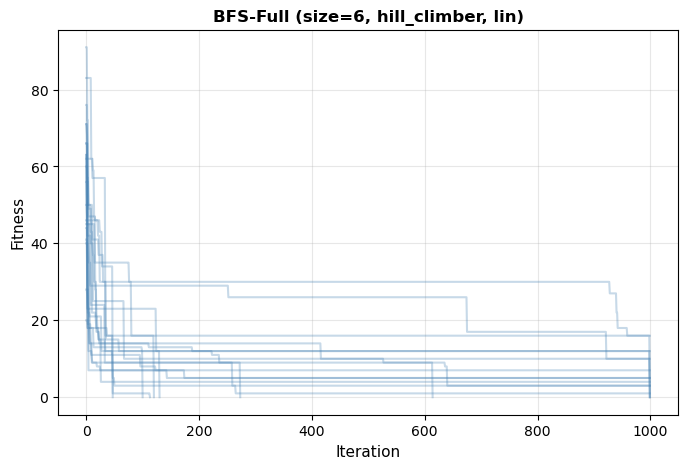

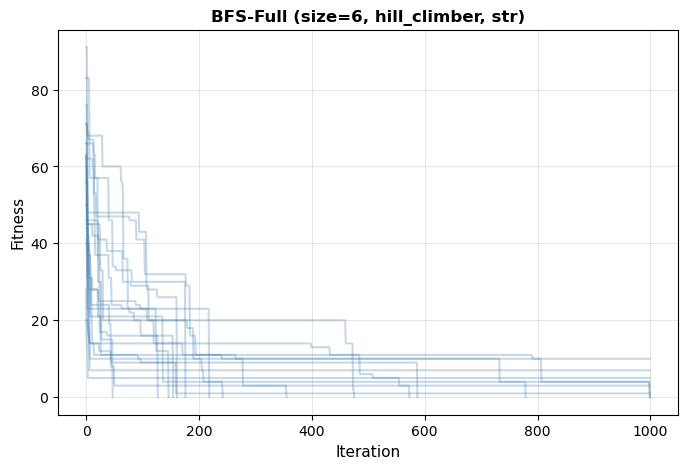

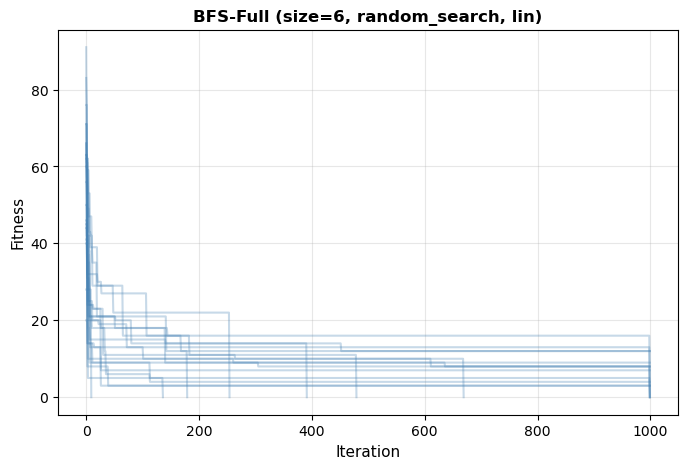

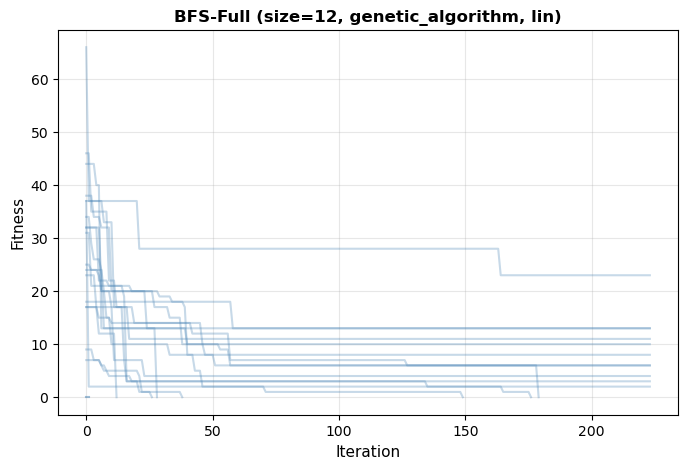

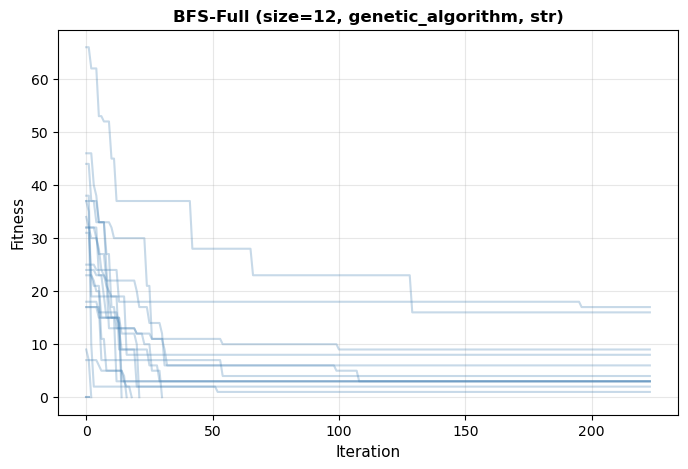

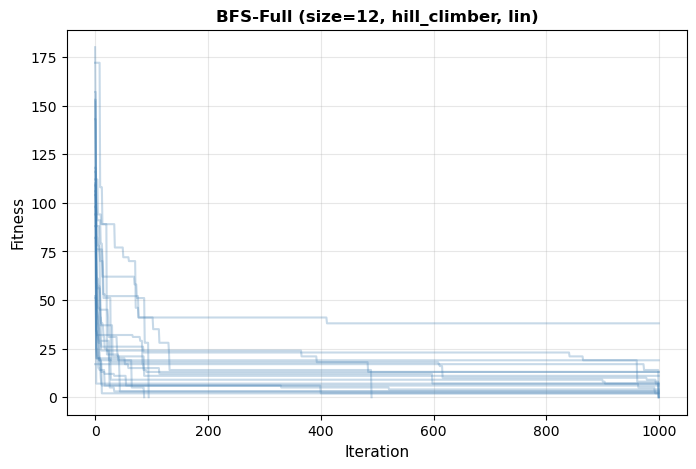

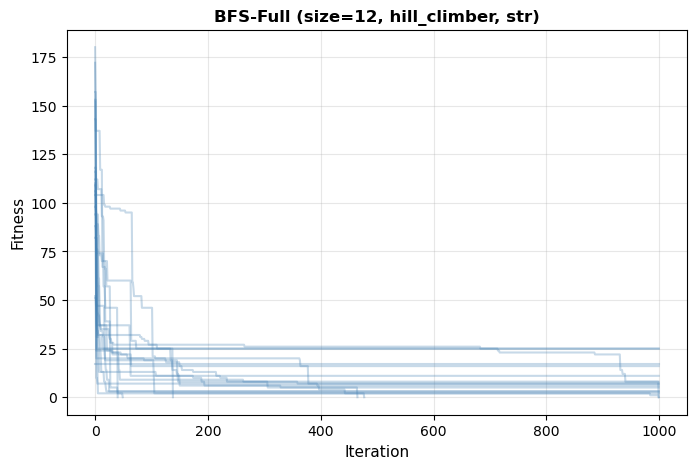

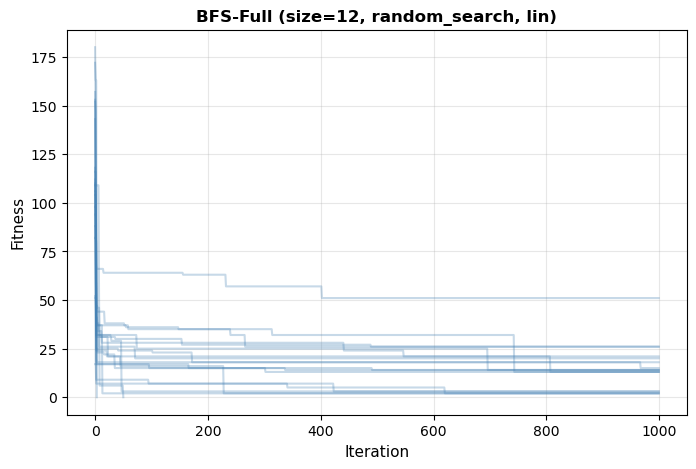

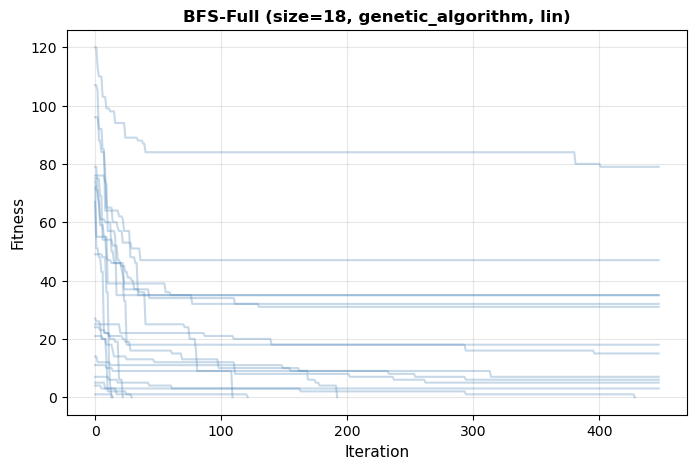

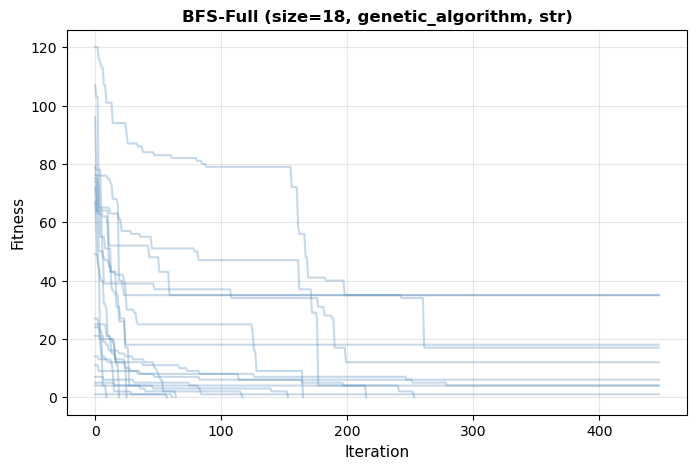

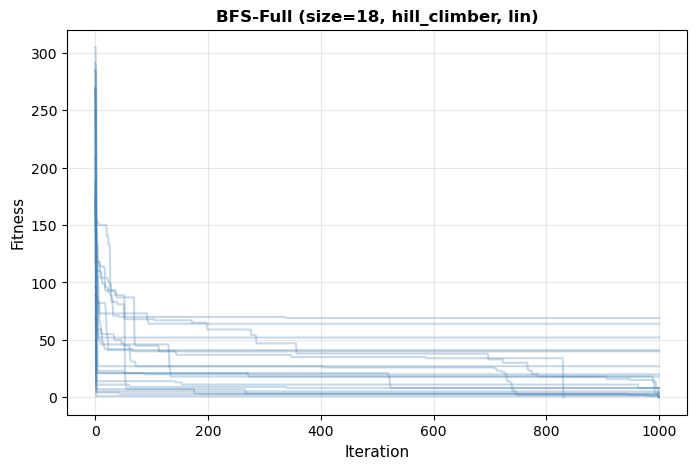

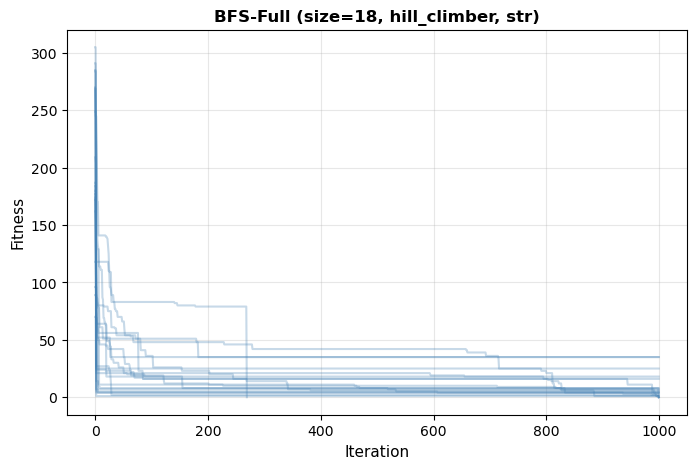

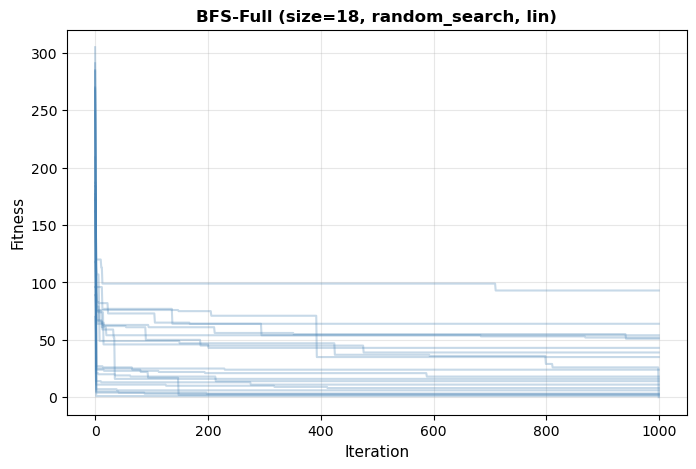

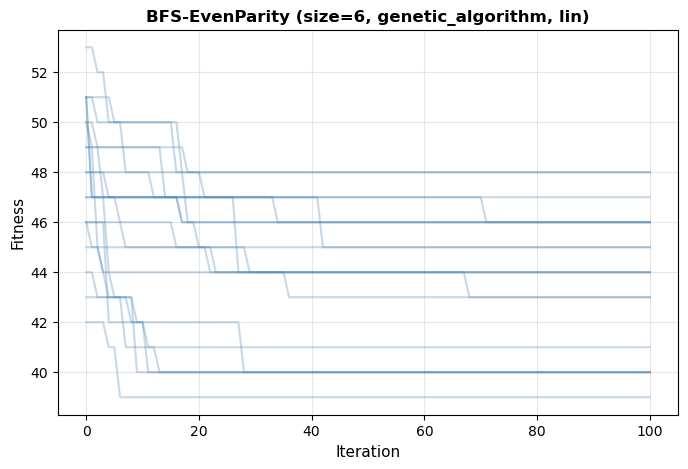

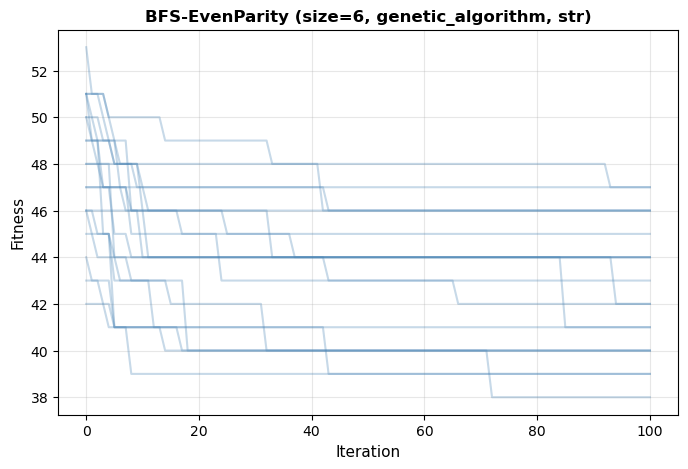

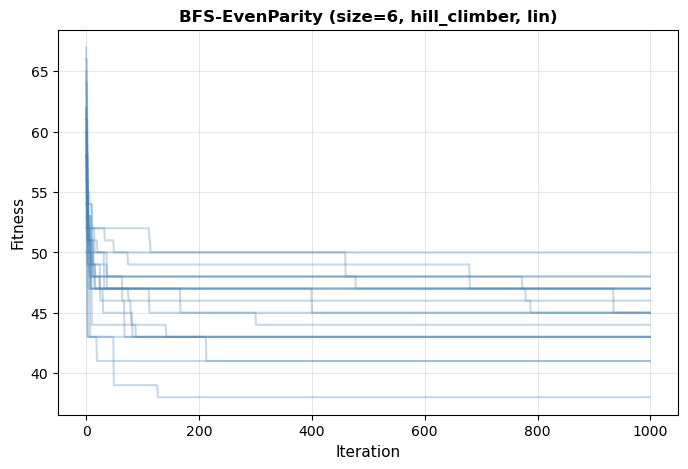

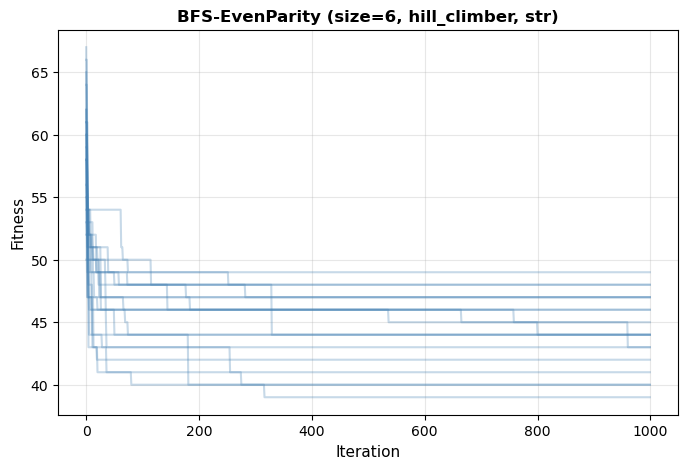

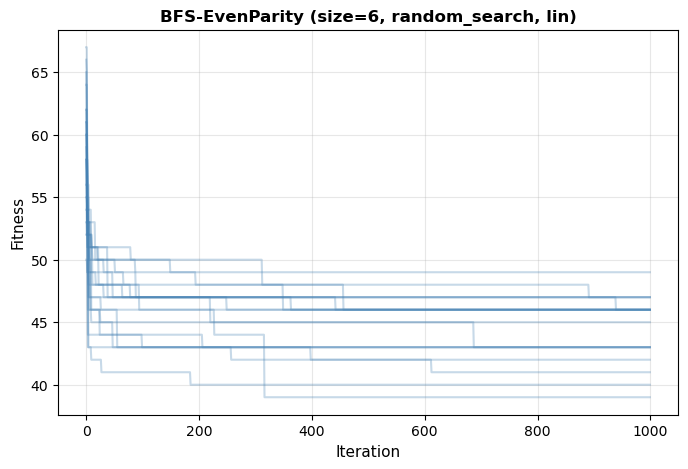

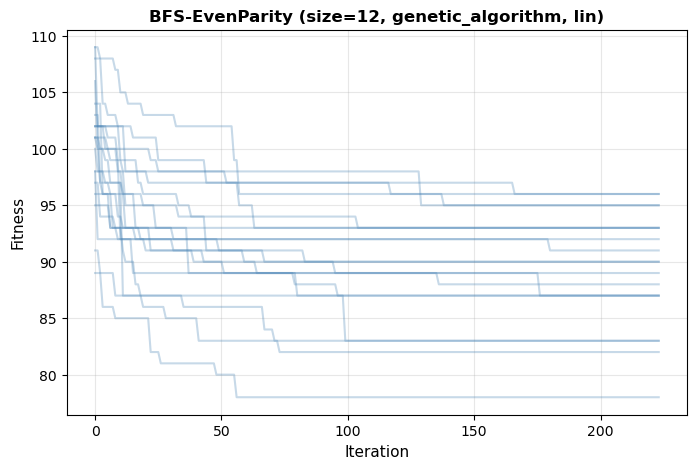

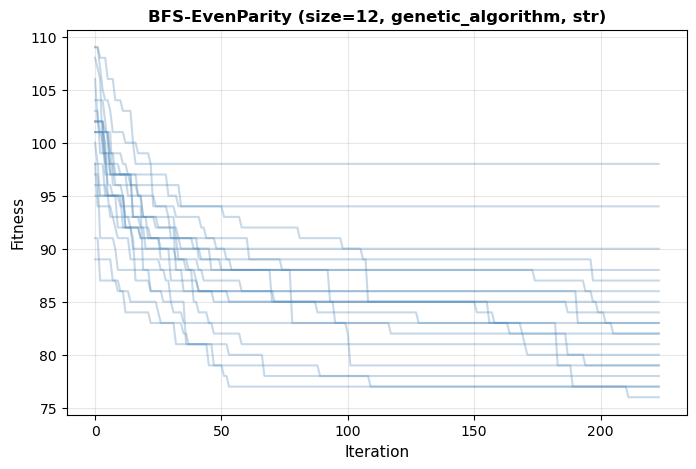

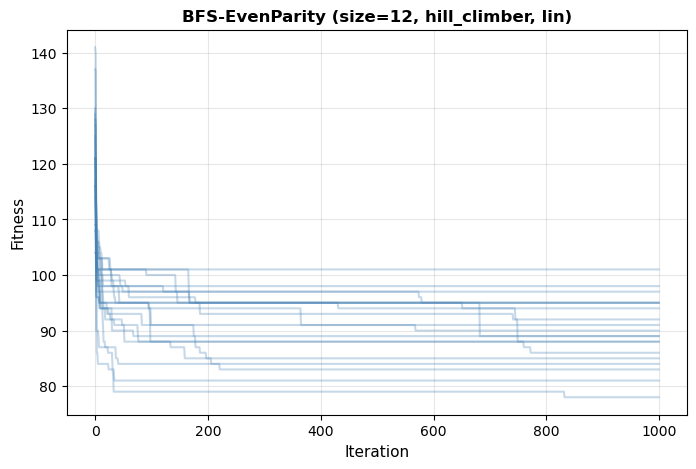

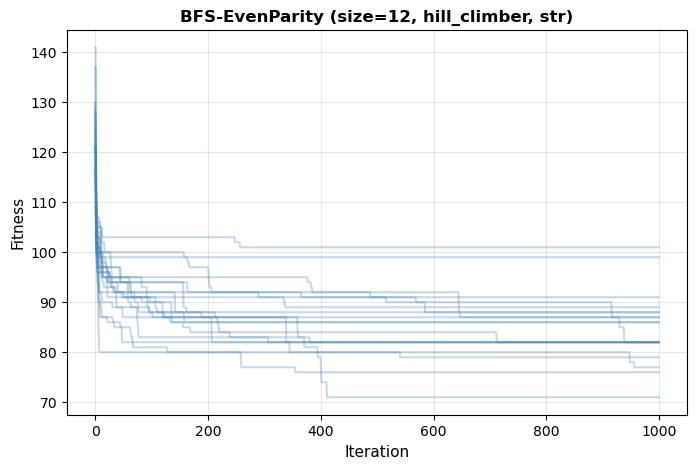

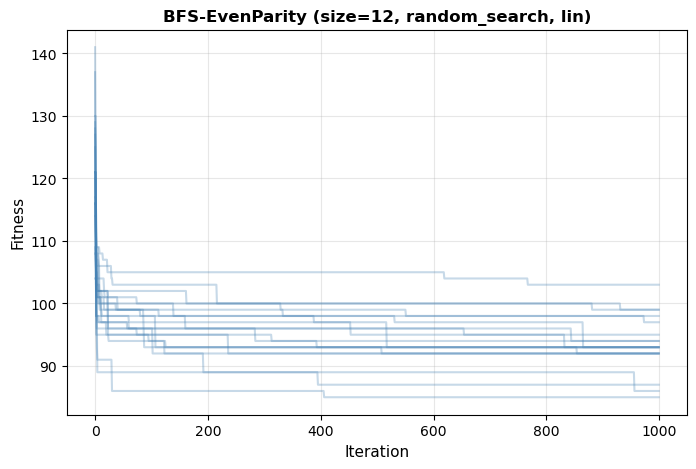

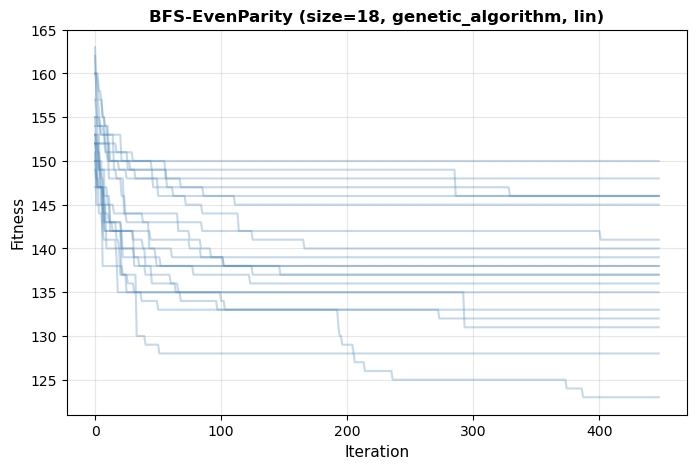

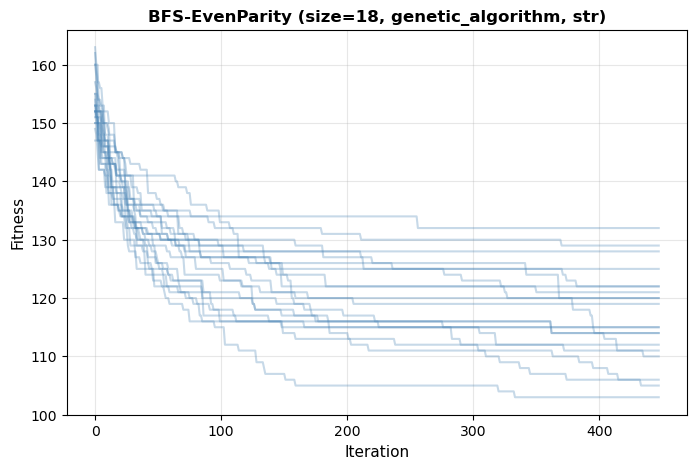

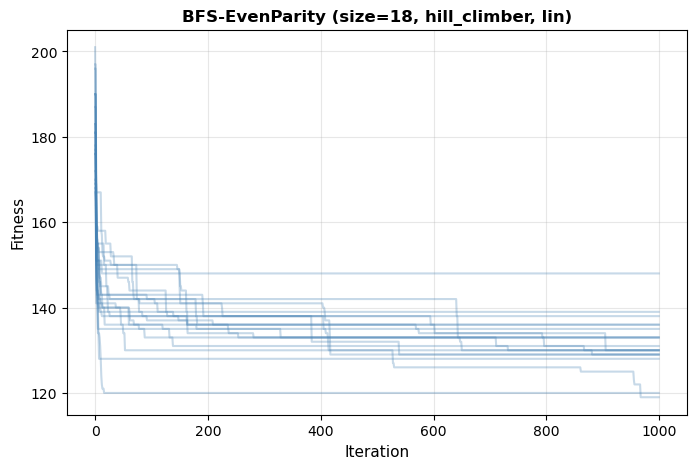

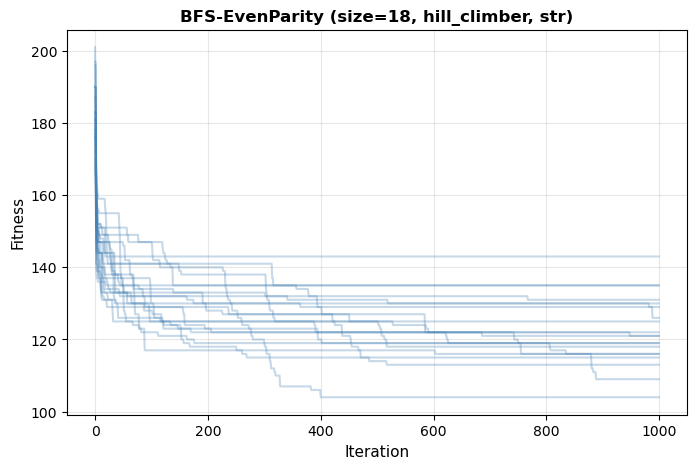

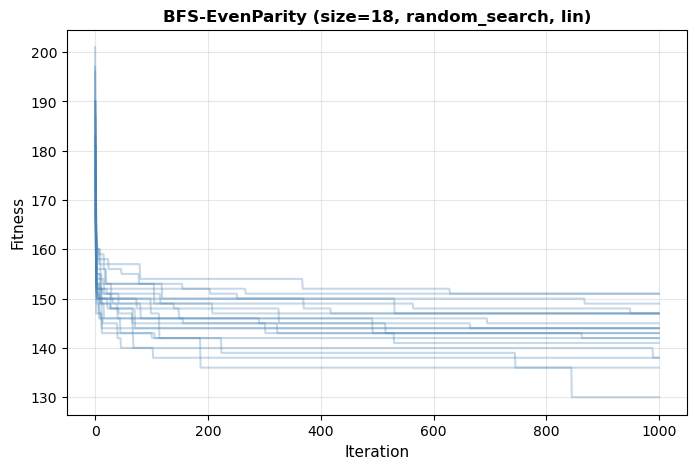

Created 60 fitness-vs-iteration plots


In [177]:
# Generate fitness-versus-iteration plots for each problem/size/solver/name_type combination
# Group by combination
grouped = history_df.groupby(['problem', 'size', 'solver', 'name_type'])

print(f"Generating {len(grouped)} fitness-vs-iteration plots...")

for (problem, size, solver, name_type), group in grouped:
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    # Plot each rep as a faint line
    for _, row in group.iterrows():
        try:
            # Read history file
            hist = pd.read_csv(row['file'])
            
            # Plot with transparency - slightly thicker lines
            ax.plot(hist.index, hist['fitness'], alpha=0.3, linewidth=1.5, color='steelblue')
            
        except Exception as e:
            print(f"Error reading {row['file']}: {e}")
    
    # Formatting
    ax.set_xlabel('Iteration', fontsize=11)
    ax.set_ylabel('Fitness', fontsize=11)
    ax.set_title(f'{problem} (size={size}, {solver}, {name_type})', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Save plot
    filename = f'outputs/fitness_history_{problem}_{size}_{solver}_{name_type}.pdf'
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()  # Display in notebook
    plt.close()

print(f"Created {len(grouped)} fitness-vs-iteration plots")

In [178]:
# Save solver summary table
solver_summary.to_csv('outputs/solver_summary_table.csv')
print("Solver summary table saved to outputs/solver_summary_table.csv")

# Export to LaTeX
latex_str = solver_summary.to_latex(float_format="%.3f", index=False)
with open('outputs/solver_summary_table.tex', 'w') as f:
    f.write(latex_str)
print("Solver summary table saved to outputs/solver_summary_table.tex")

Solver summary table saved to outputs/solver_summary_table.csv
Solver summary table saved to outputs/solver_summary_table.tex


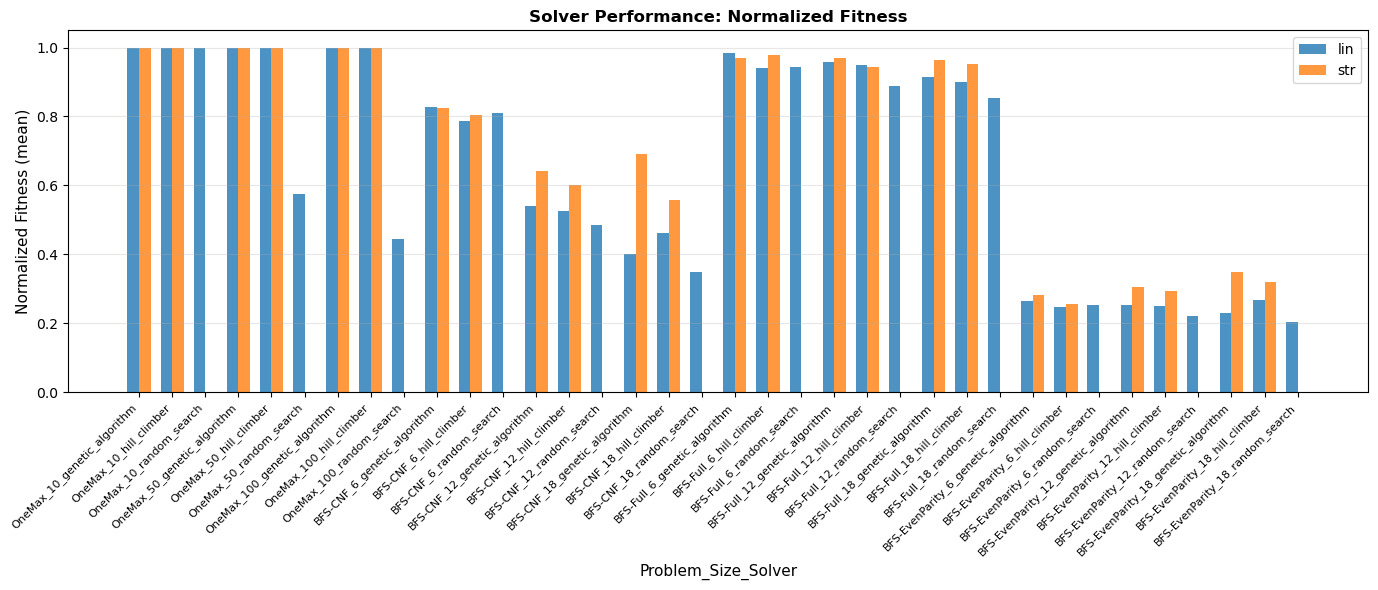

In [179]:
# Visualize solver performance using norm_fx
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Prepare data for plotting
plot_data = solver_summary.copy()

# Create x-axis labels combining problem, size, and solver
plot_data['problem_size_solver'] = (plot_data['problem'].astype(str) + '_' + 
                                     plot_data['size'].astype(str) + '_' + 
                                     plot_data['solver'])

# Get unique problem_size_solver combinations in order
problem_size_solvers = plot_data['problem_size_solver'].unique()

# Set up bar positions
x = np.arange(len(problem_size_solvers))
width = 0.35

# Separate data by name_type
lin_data = plot_data[plot_data['name_type'] == 'lin'].set_index('problem_size_solver')['norm_fx_mean']
str_data = plot_data[plot_data['name_type'] == 'str'].set_index('problem_size_solver')['norm_fx_mean']

# Align data with problem_size_solvers order
lin_values = [lin_data.get(ps, 0) for ps in problem_size_solvers]
str_values = [str_data.get(ps, 0) for ps in problem_size_solvers]

# Create bars
ax.bar(x - width/2, lin_values, width, label='lin', alpha=0.8)
ax.bar(x + width/2, str_values, width, label='str', alpha=0.8)

# Formatting
ax.set_xlabel('Problem_Size_Solver', fontsize=11)
ax.set_ylabel('Normalized Fitness (mean)', fontsize=11)
ax.set_title('Solver Performance: Normalized Fitness', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(problem_size_solvers, rotation=45, ha='right', fontsize=8)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/solver_norm_fx_barplot.pdf', format='pdf', bbox_inches='tight', dpi=300)
plt.show()